In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import os
from FACS_Sampling.utils import create_adata

sc.set_figure_params(figsize=(8,8), fontsize=15, )
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
# import warnings
# warnings.filterwarnings("ignore")

/home/ekarimi/miniconda3/envs/facs_sampling/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.6 anndata==0.10.3 umap==0.5.5 numpy==1.26.0 scipy==1.11.4 pandas==2.1.1 scikit-learn==1.3.2 statsmodels==0.14.0 igraph==0.11.3 pynndescent==0.5.11


In [2]:

# Get the file path from the environment variable
file_path_env = os.getenv('MY_FACS_DATA_PATH')
input_file1 = os.path.join(file_path_env,'sara_data',"adata_ref_sara_2M.h5ad")
input_file2 = os.path.join(file_path_env,'sara_data', 'reps',"random_adata_2_30__0.h5ad")
input_file3 = os.path.join(file_path_env,'sara_data', 'reps',"fsbs_adata_2_30__0.h5ad")

adata_ref = sc.read_h5ad(input_file1)
adata_random = sc.read_h5ad(input_file2)
adata_fsbs =  sc.read_h5ad(input_file3)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scanpy as sc

# Set the style for seaborn plots
sns.set_style('whitegrid')

def plot_feature_distribution(adata_list, feature_name, dataset_labels):
    plt.figure(figsize=(10, 6))

    # Plotting the KDE for each dataset
    for adata, label in zip(adata_list, dataset_labels):
        sns.kdeplot(
            adata.obs_vector(feature_name),  # This extracts the feature values
            label=label,
            shade=True  # Shade under the KDE curve
        )

    plt.title(f'Distribution of {feature_name}')
    plt.xlabel(f'{feature_name} Value')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()





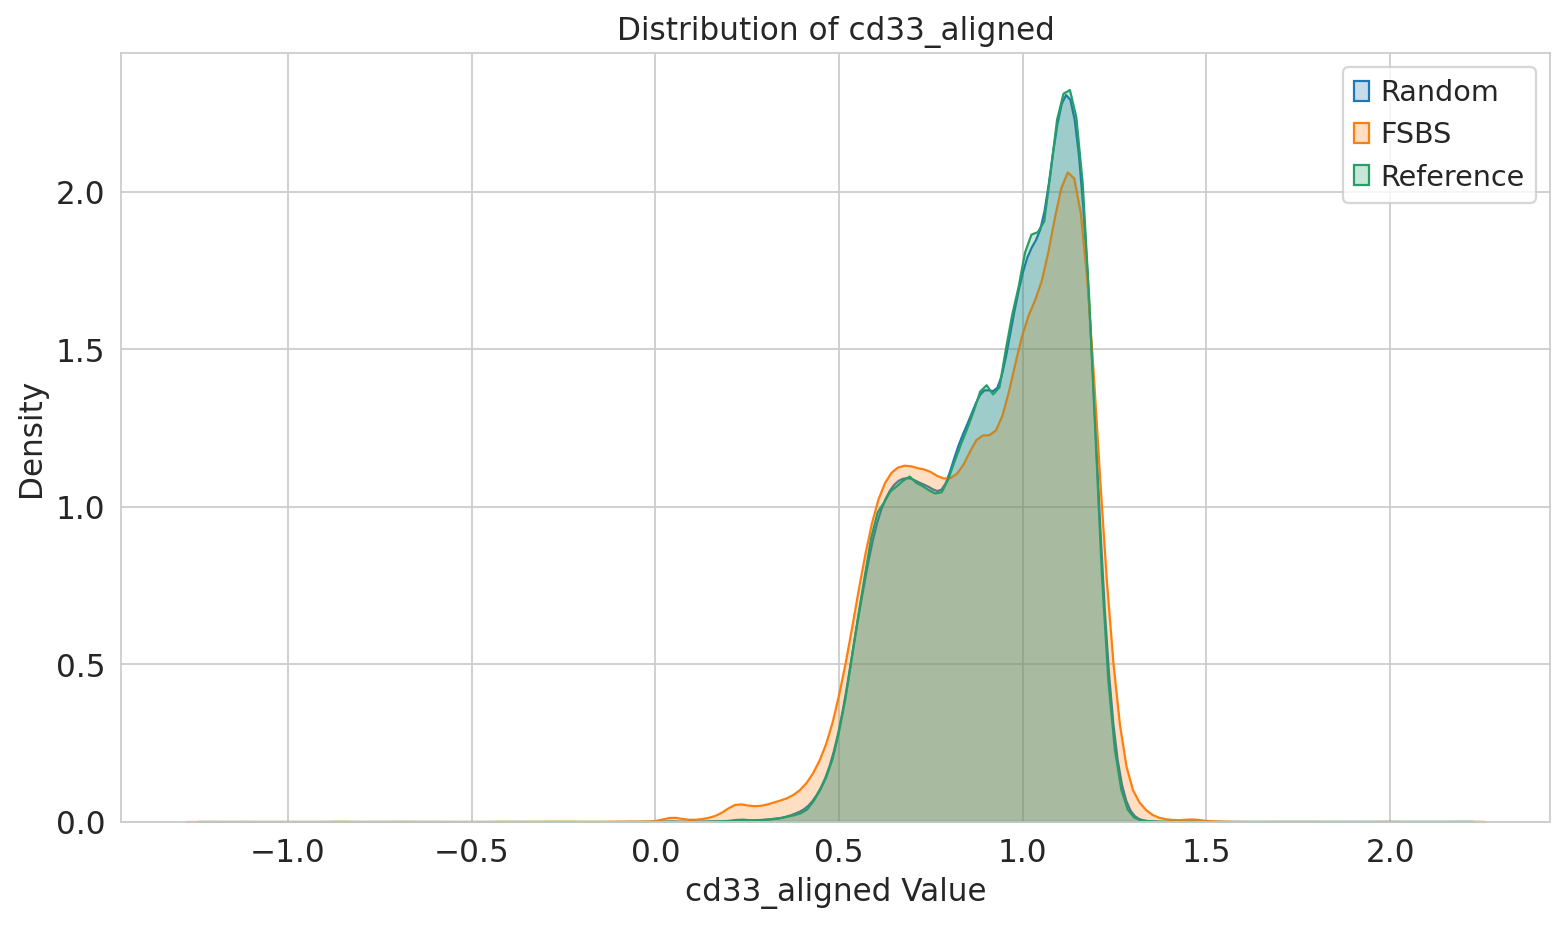

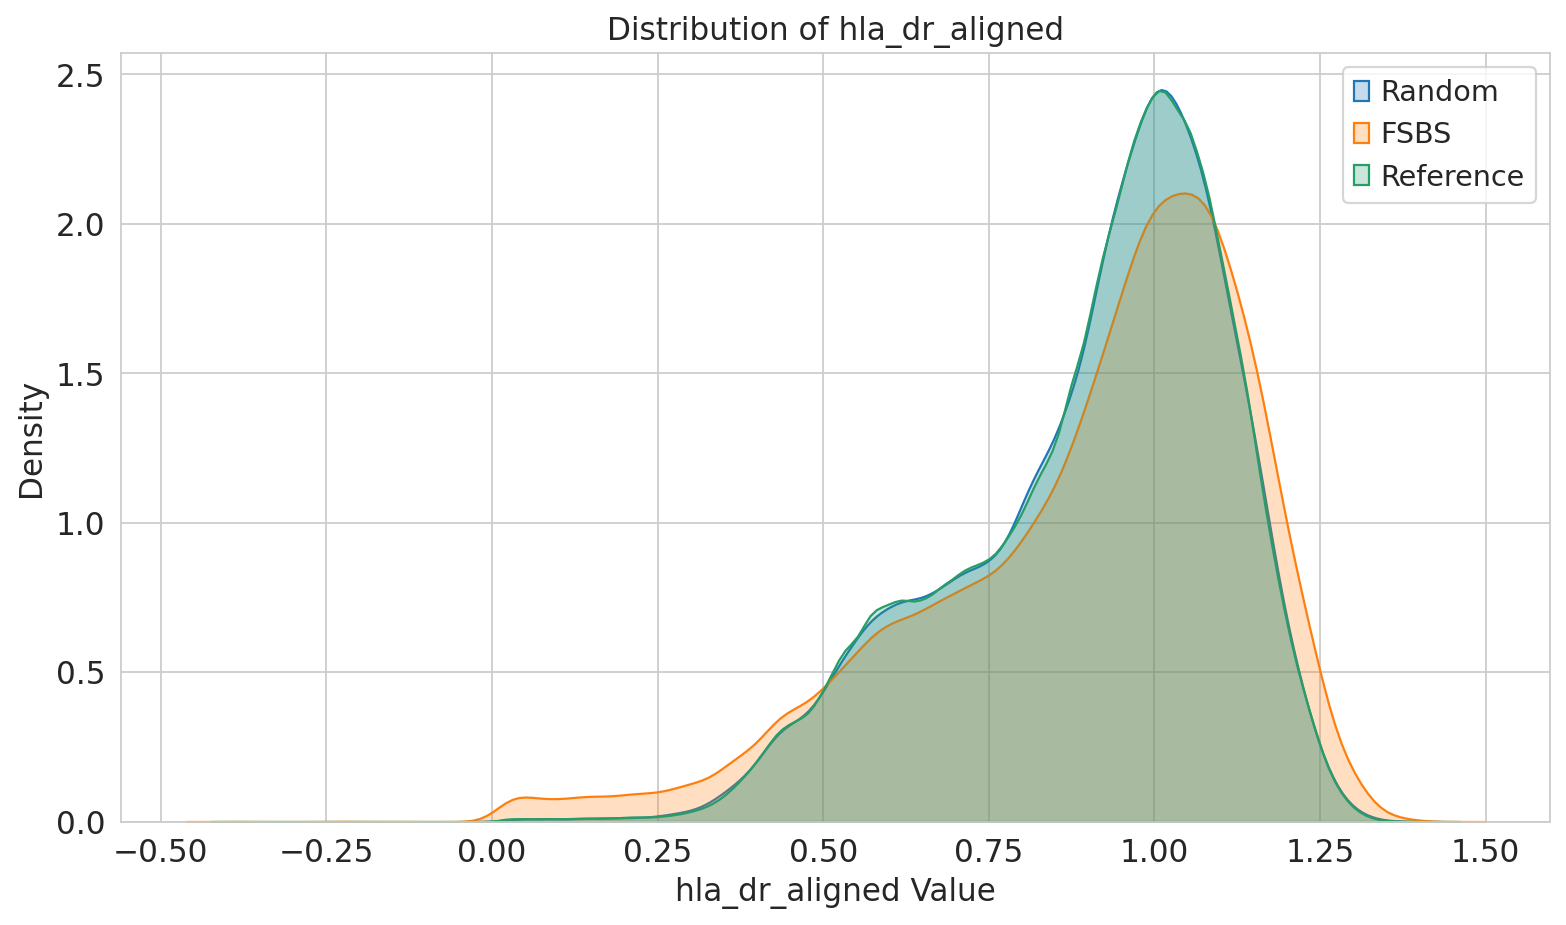

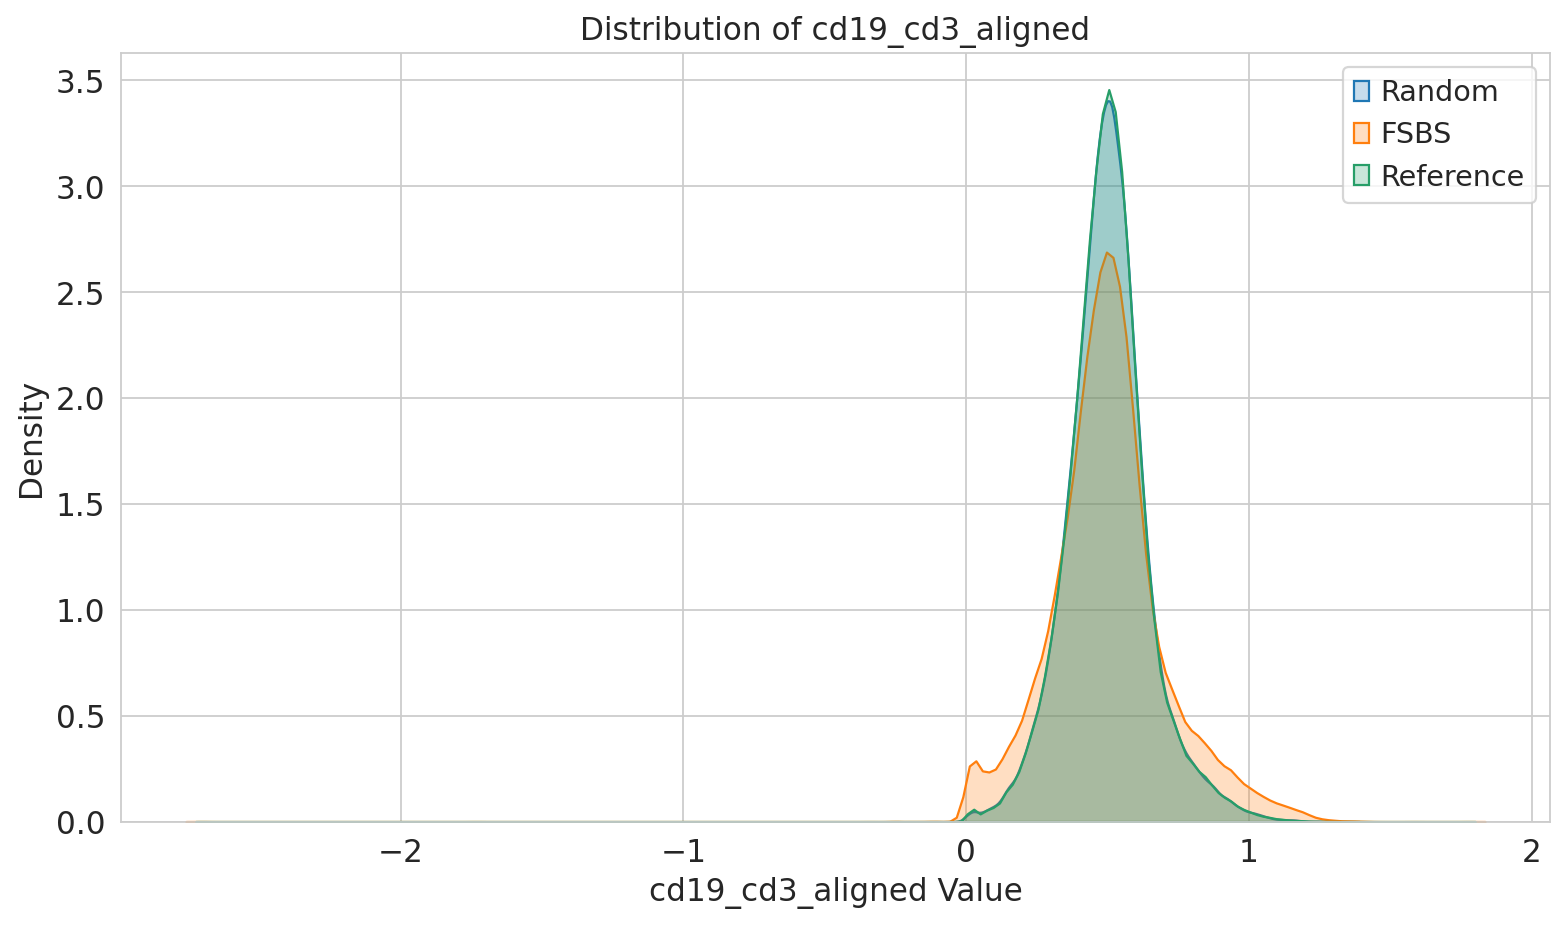

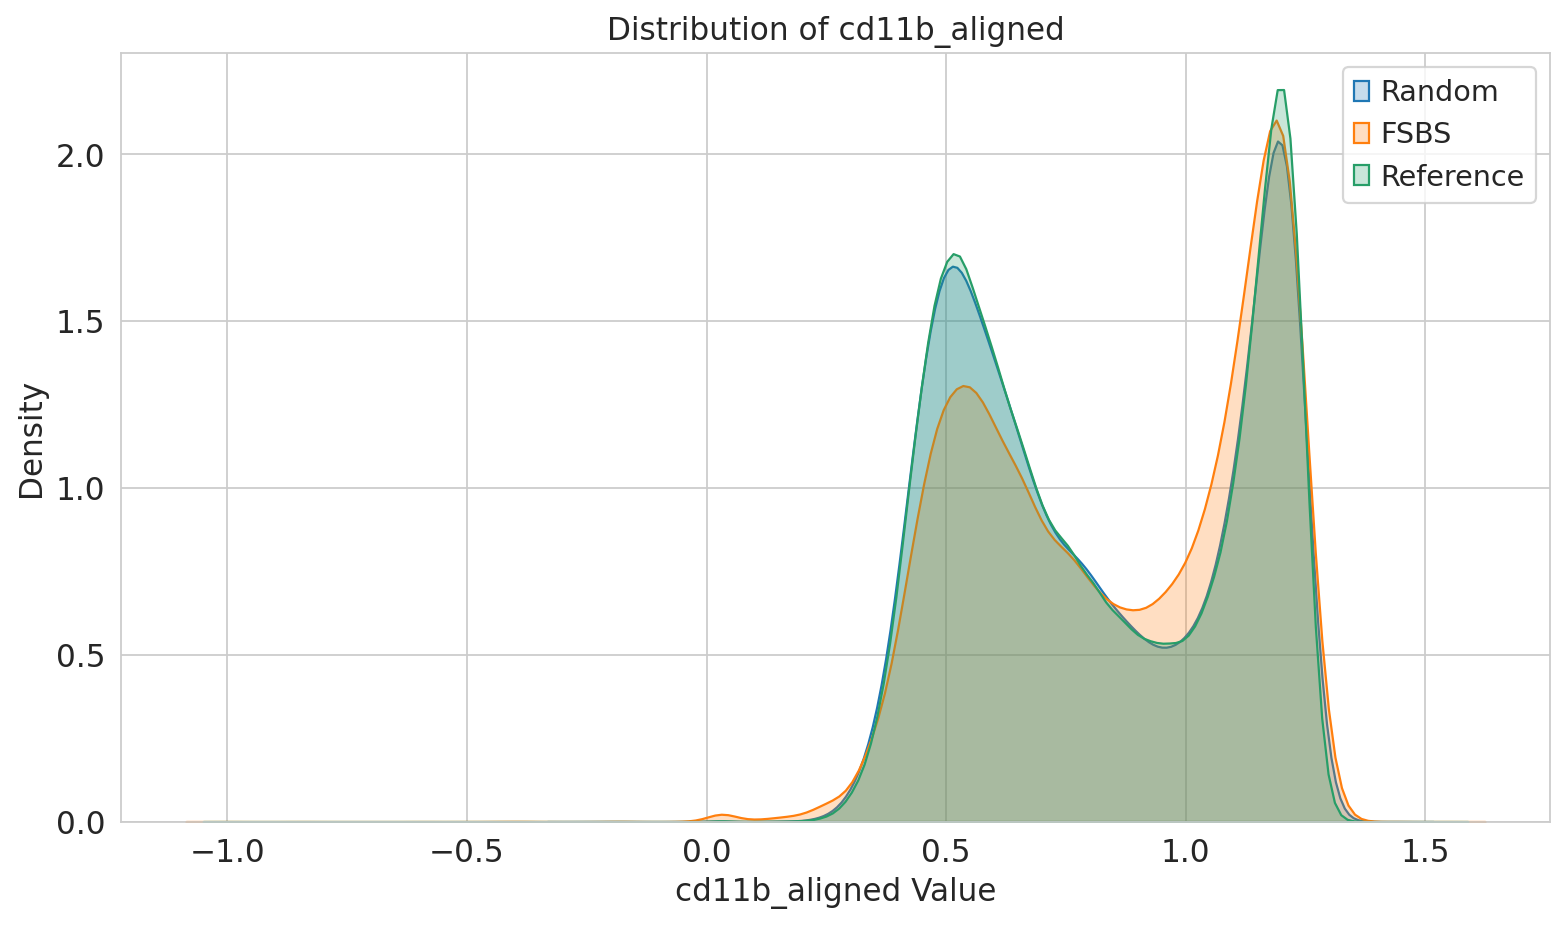

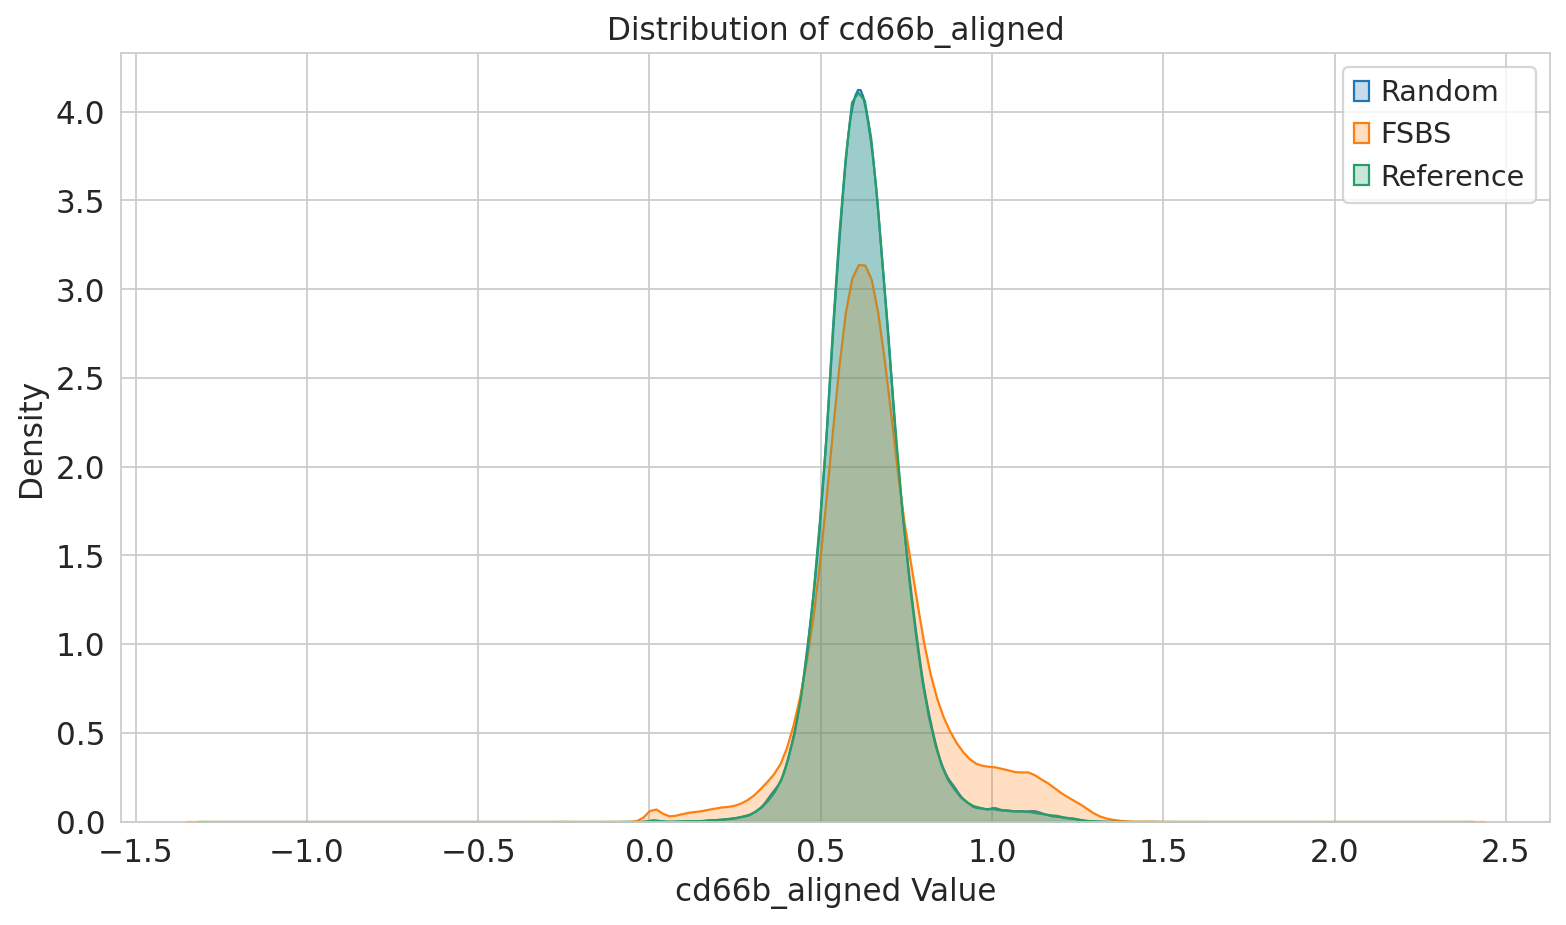

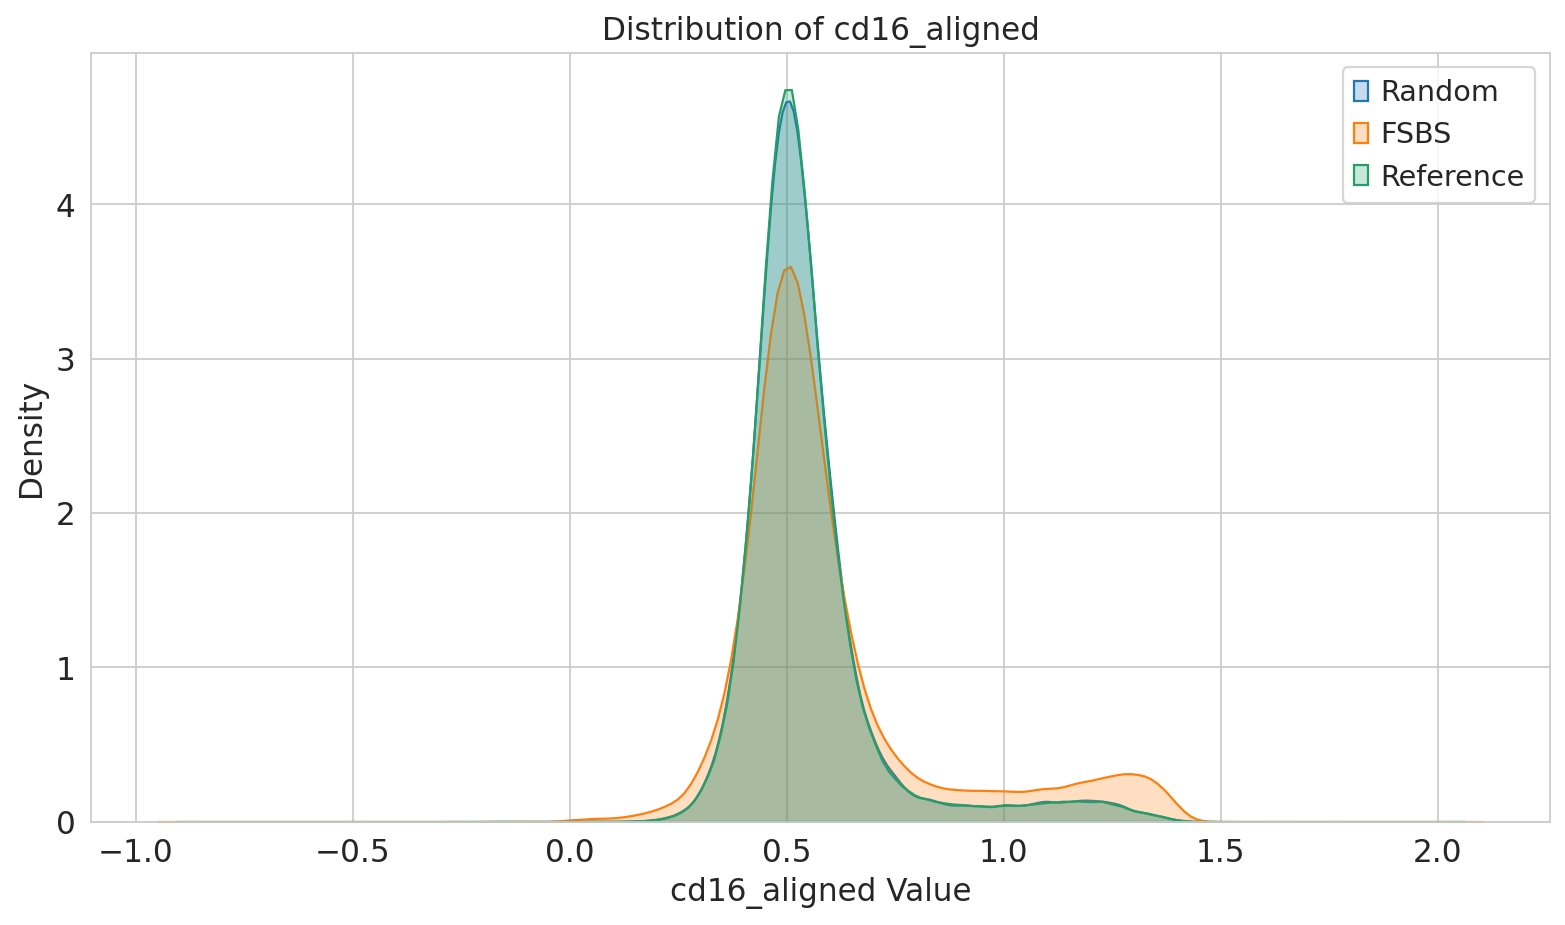

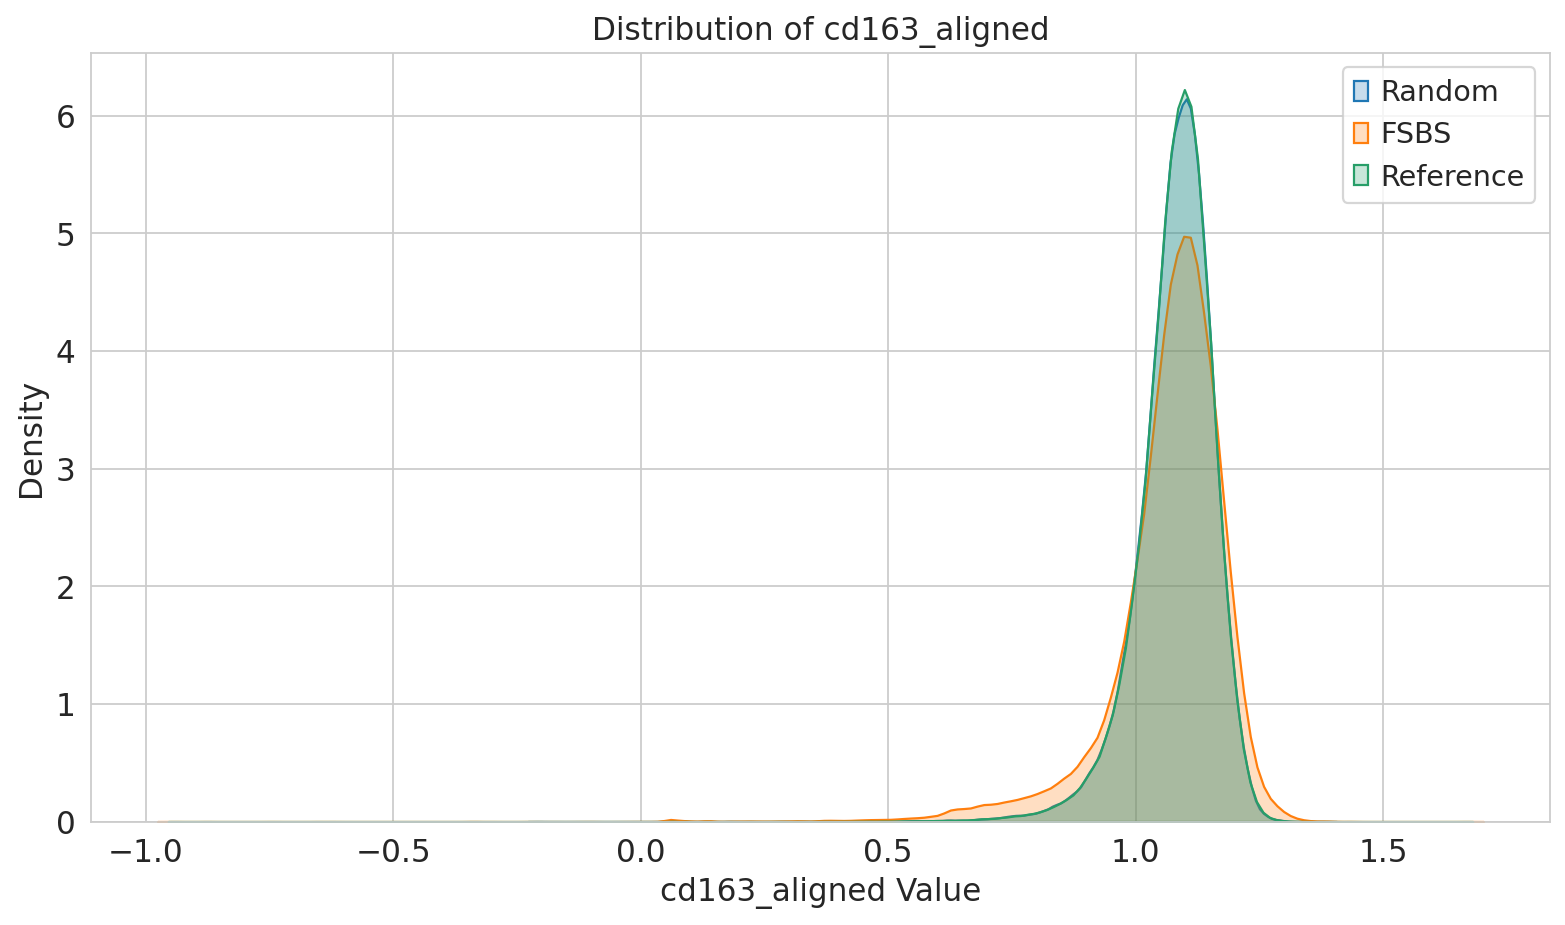

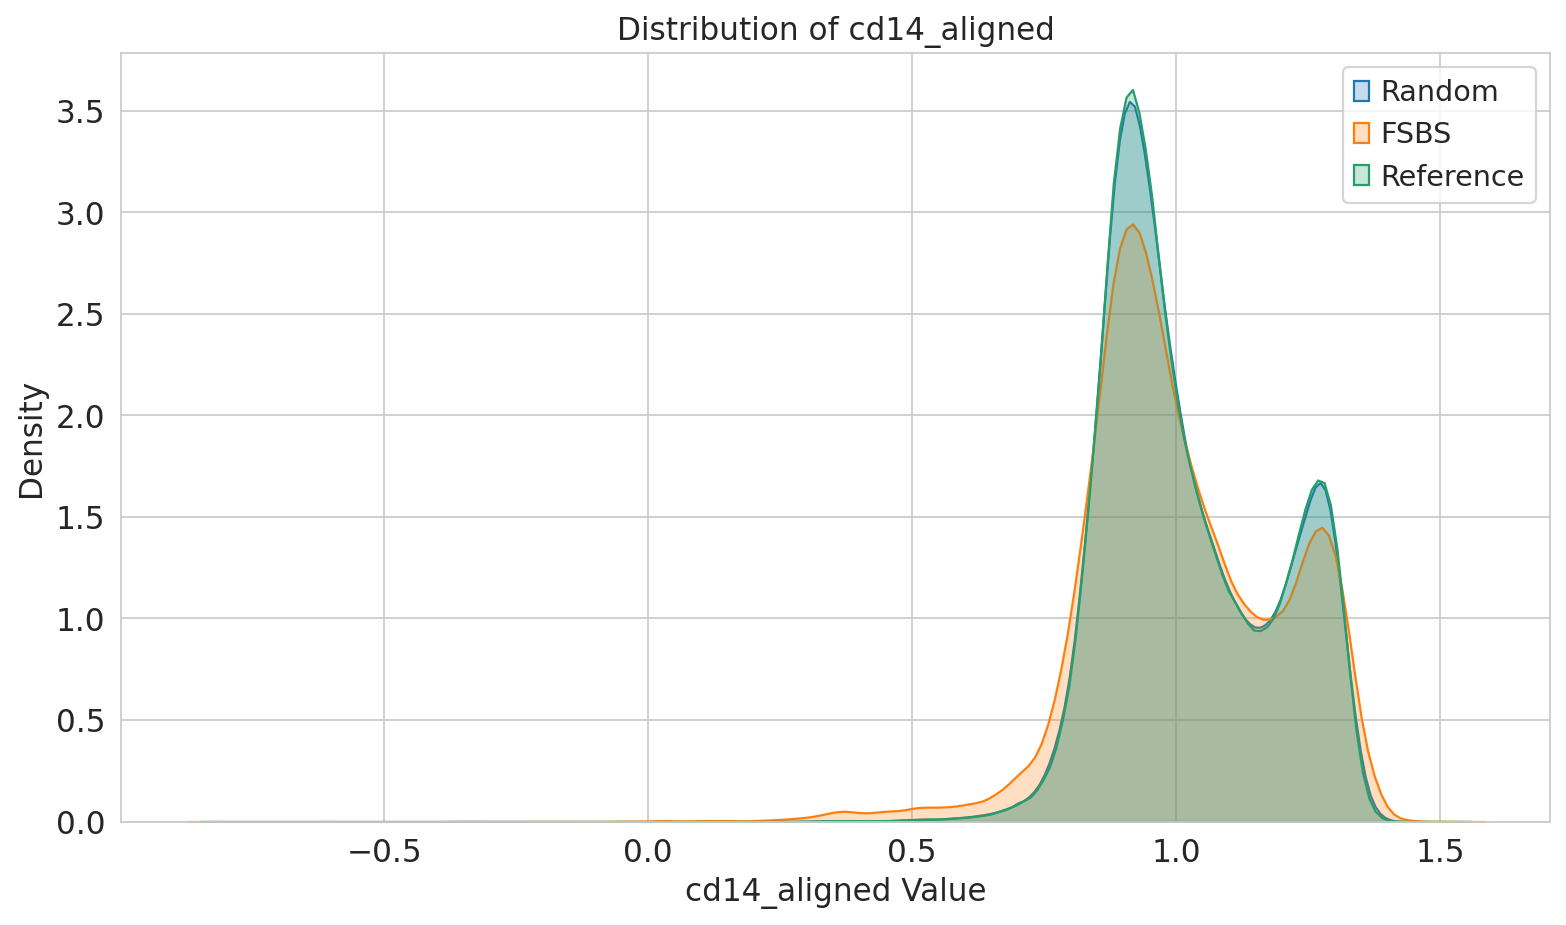

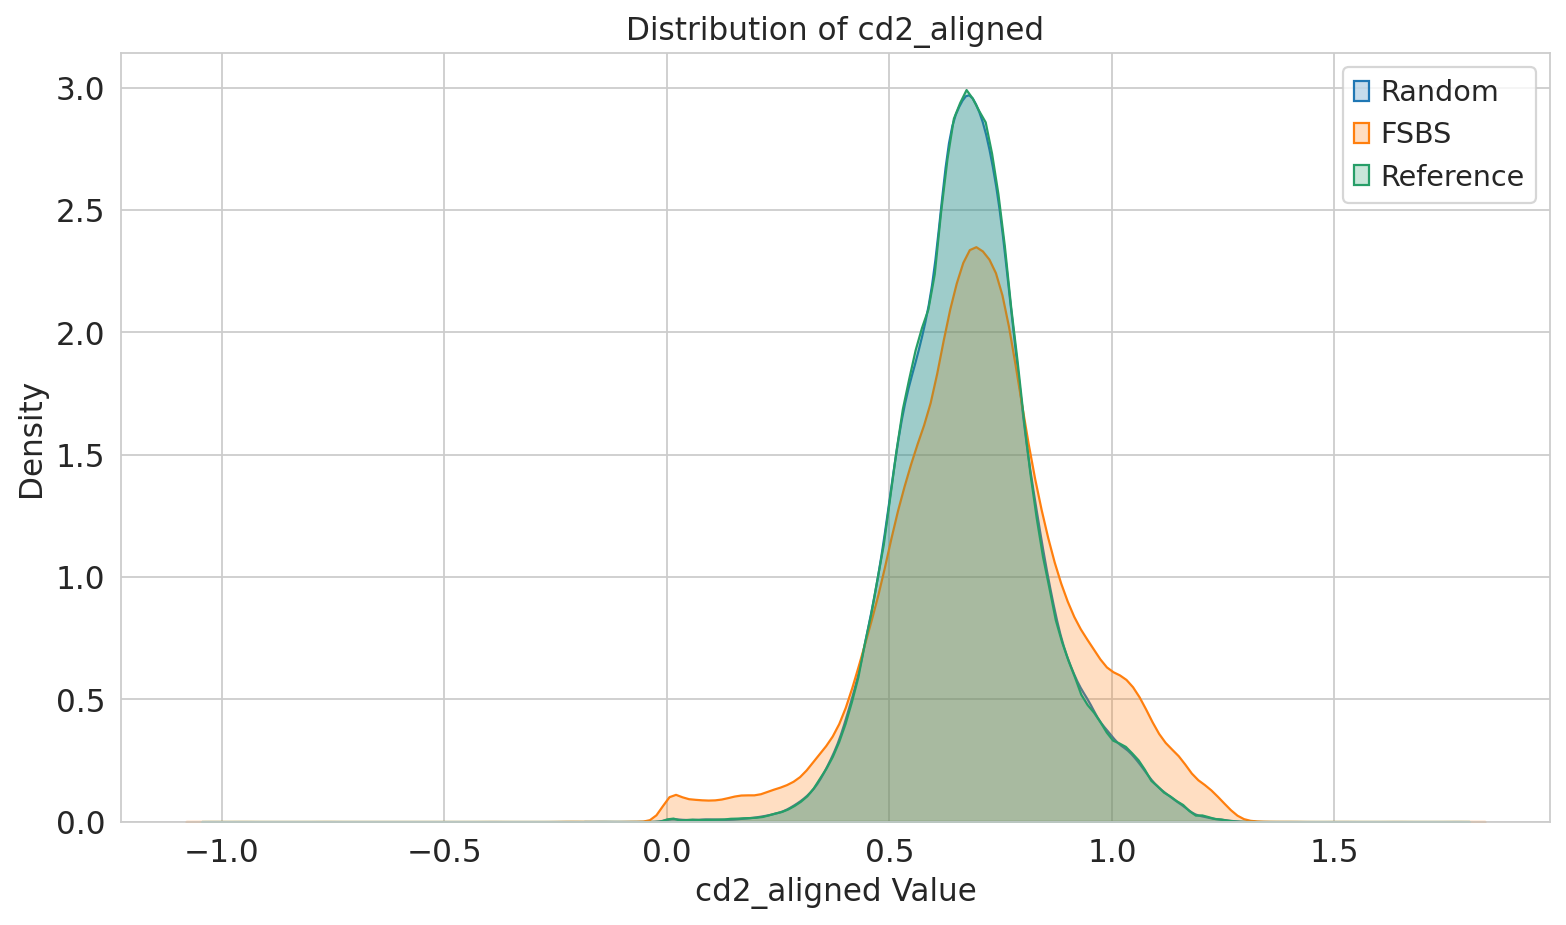

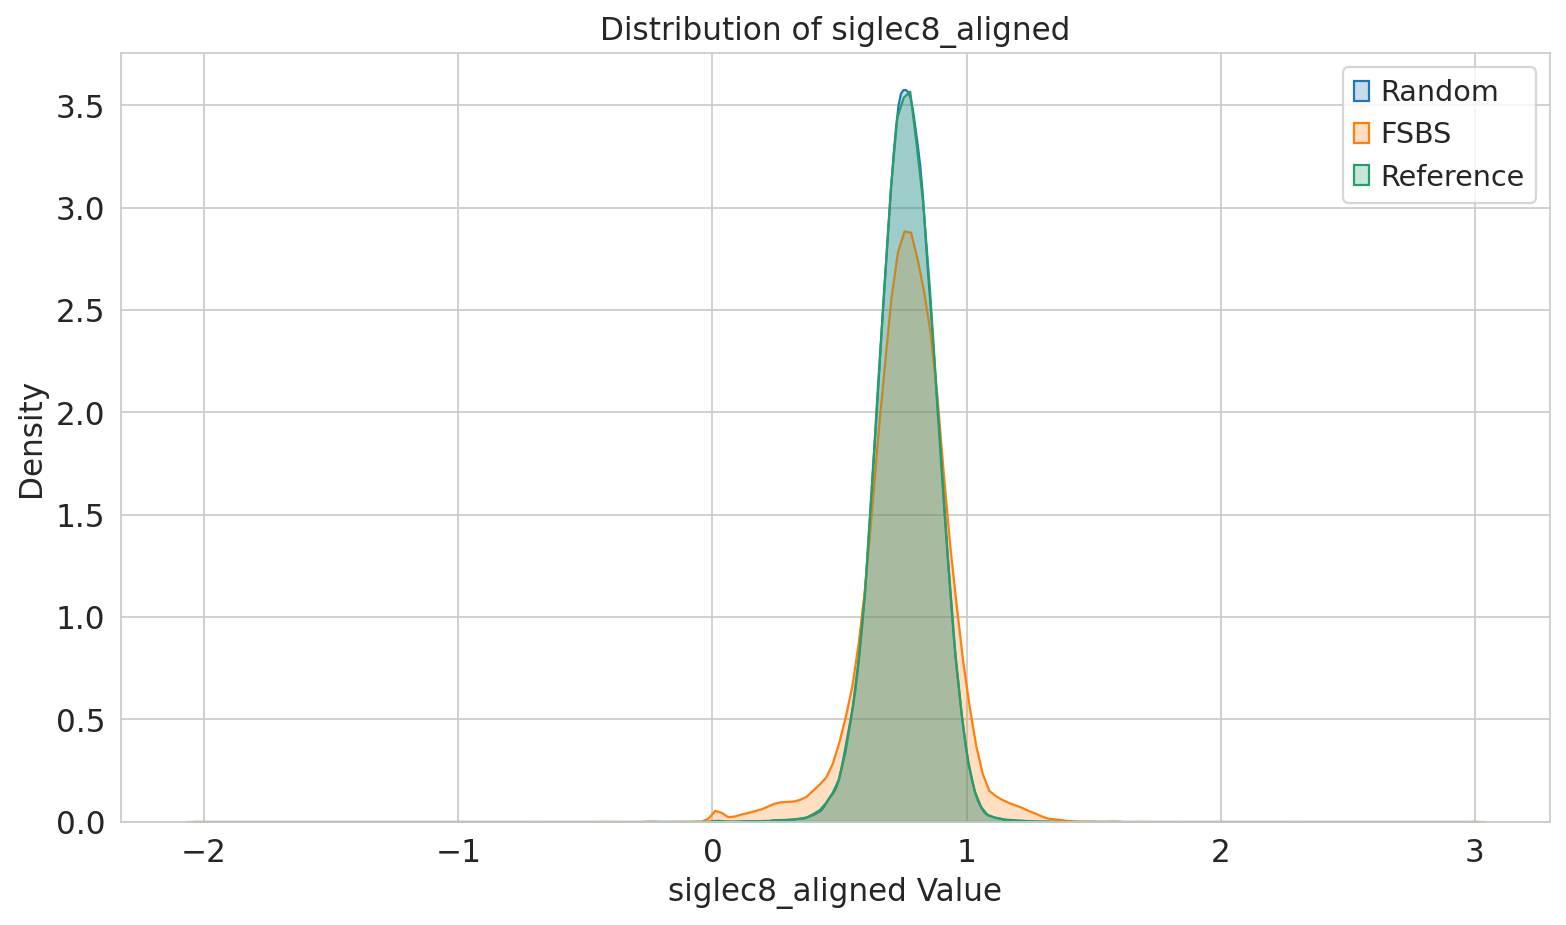

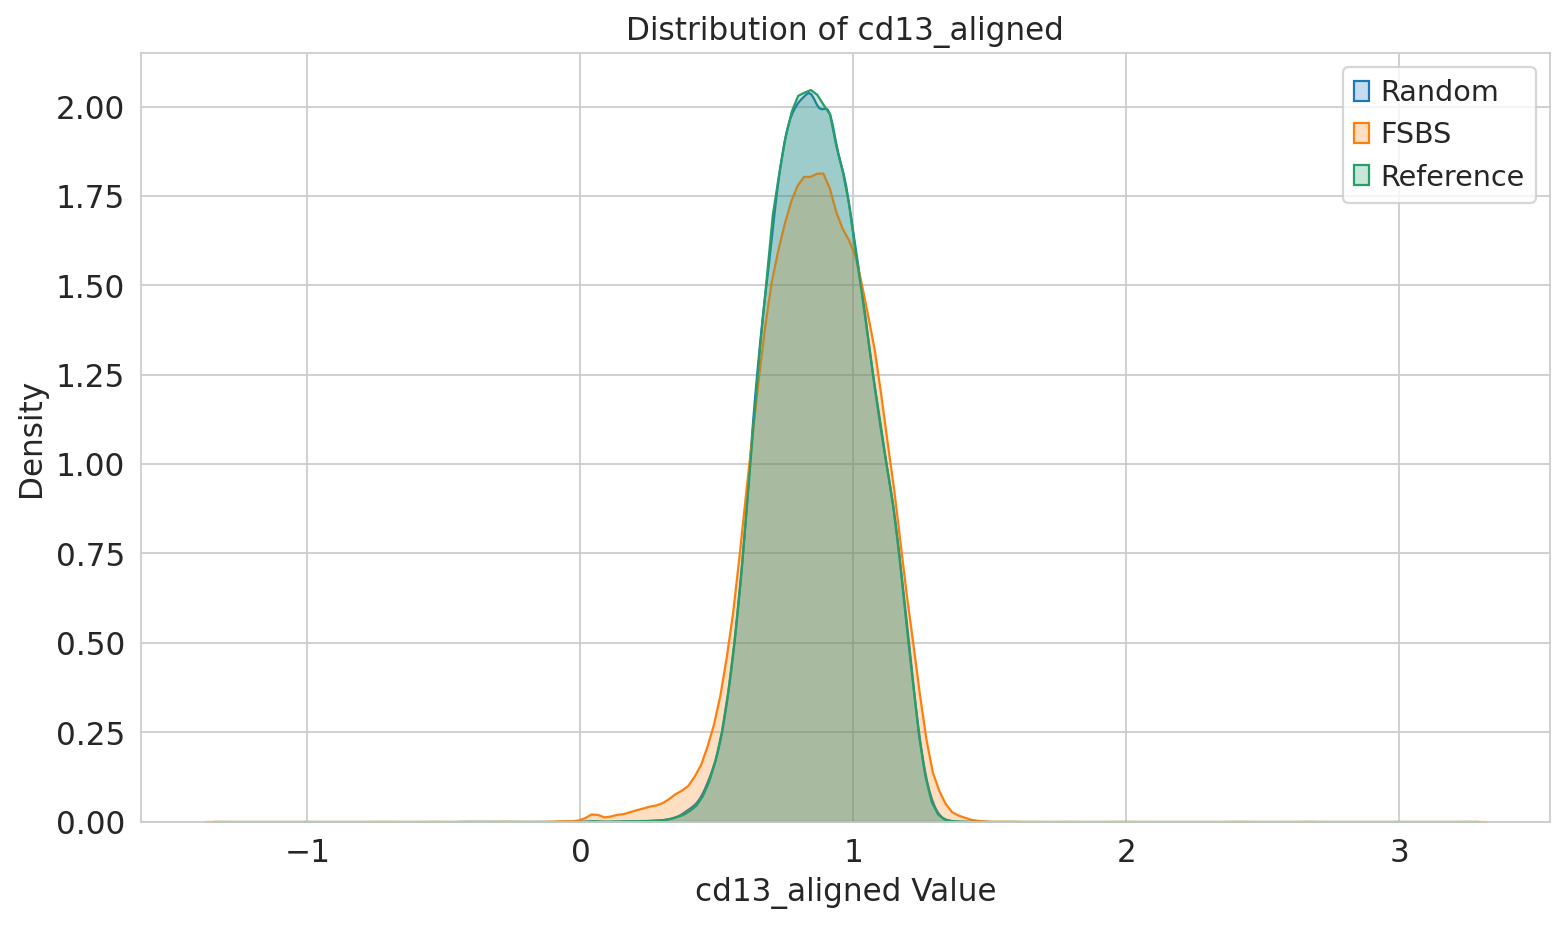

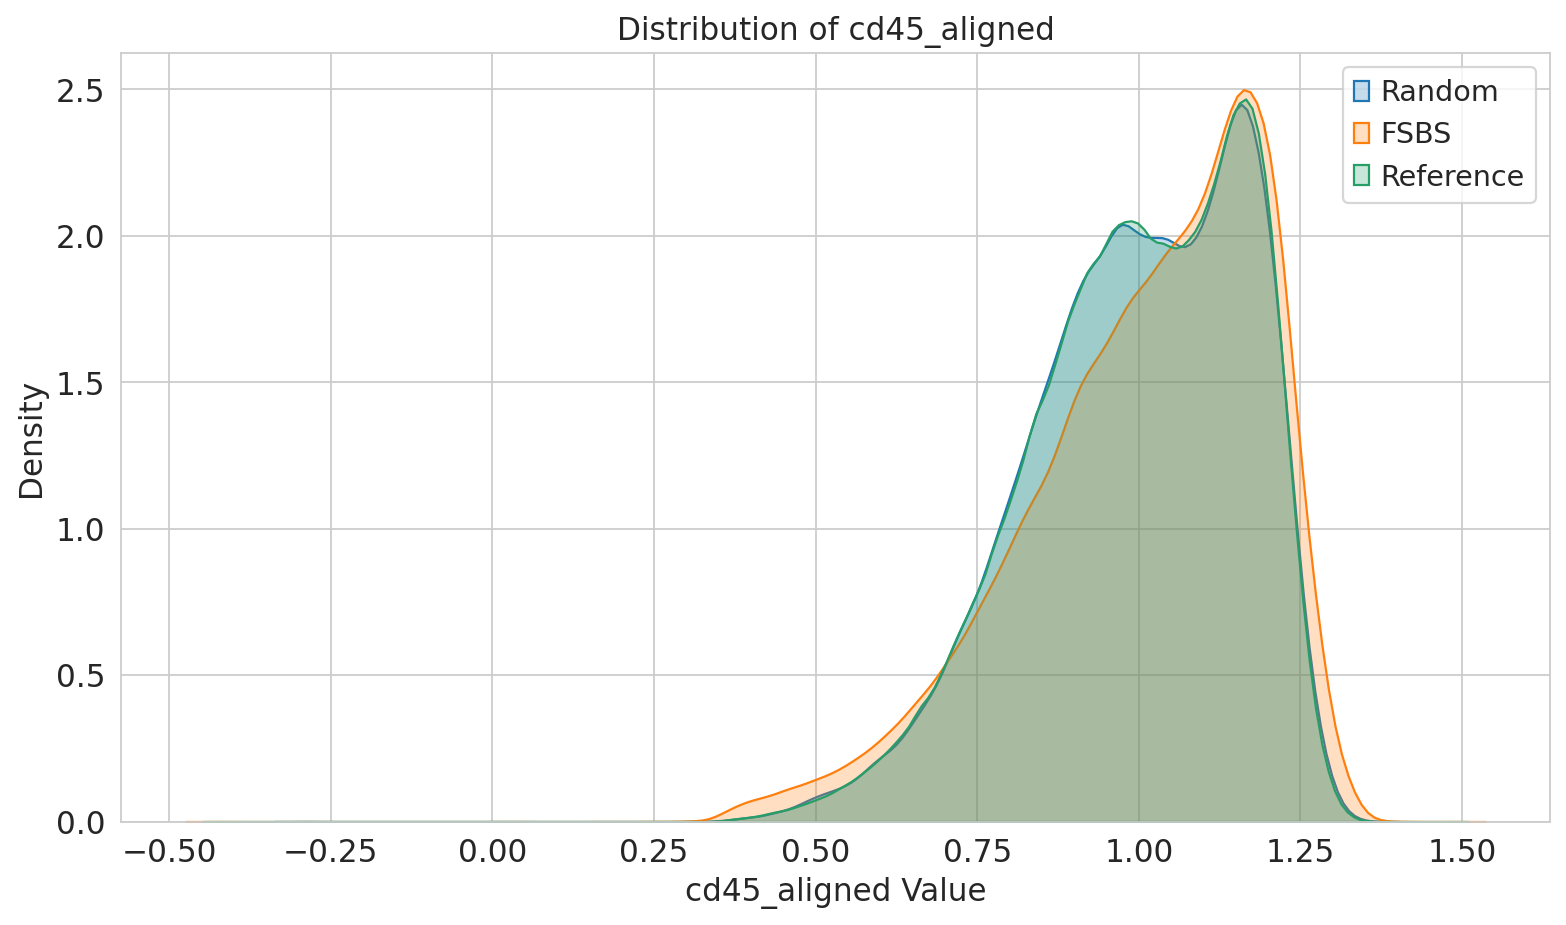

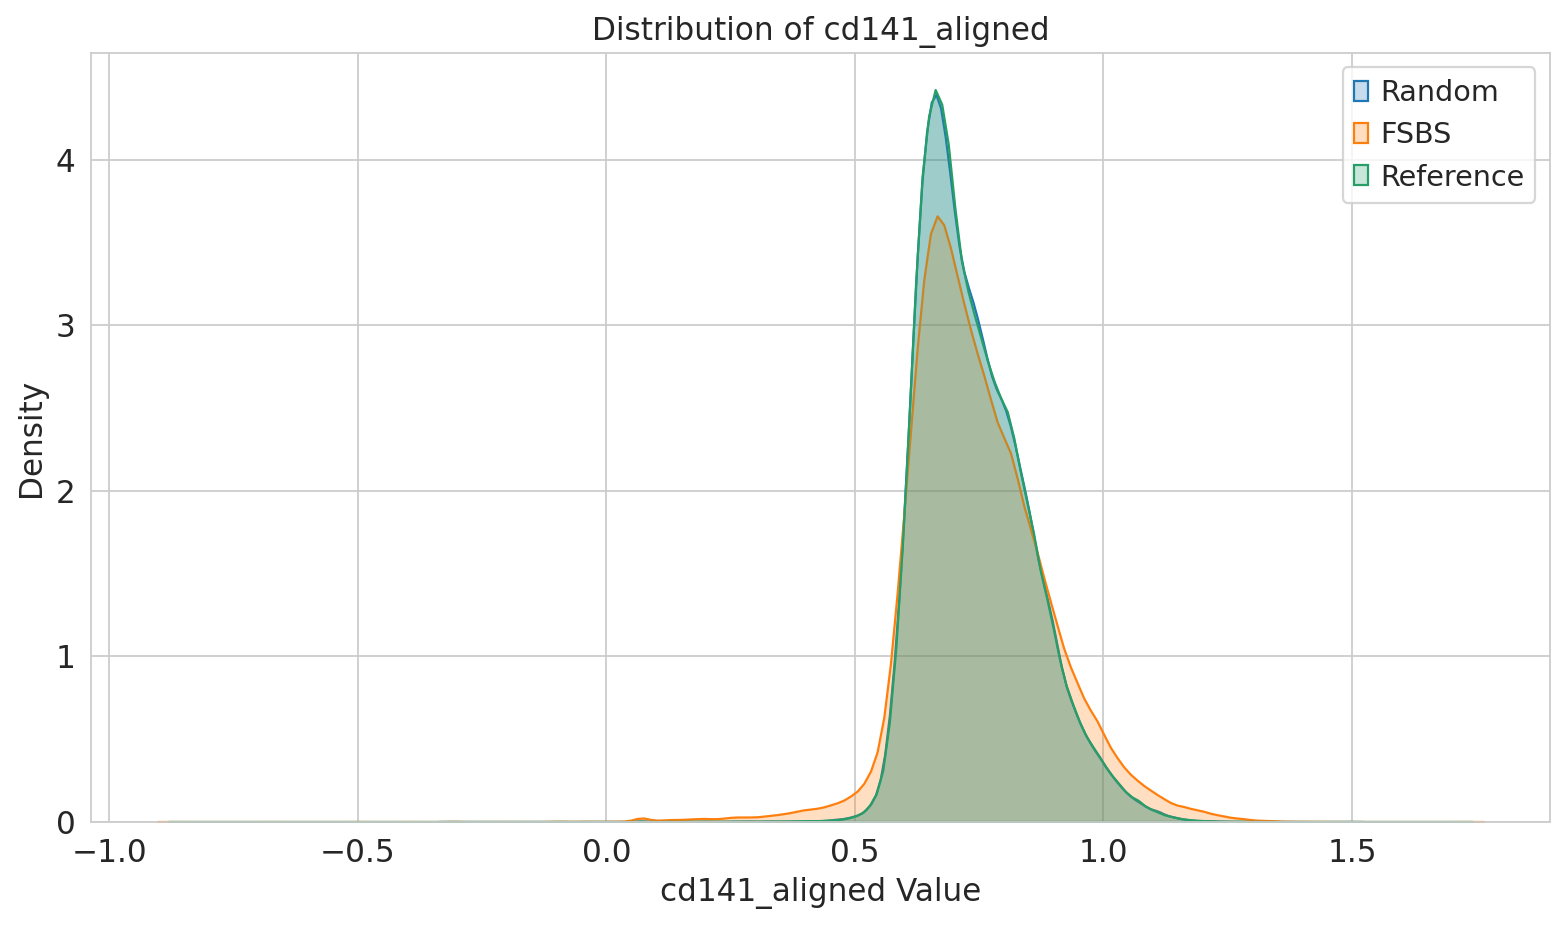

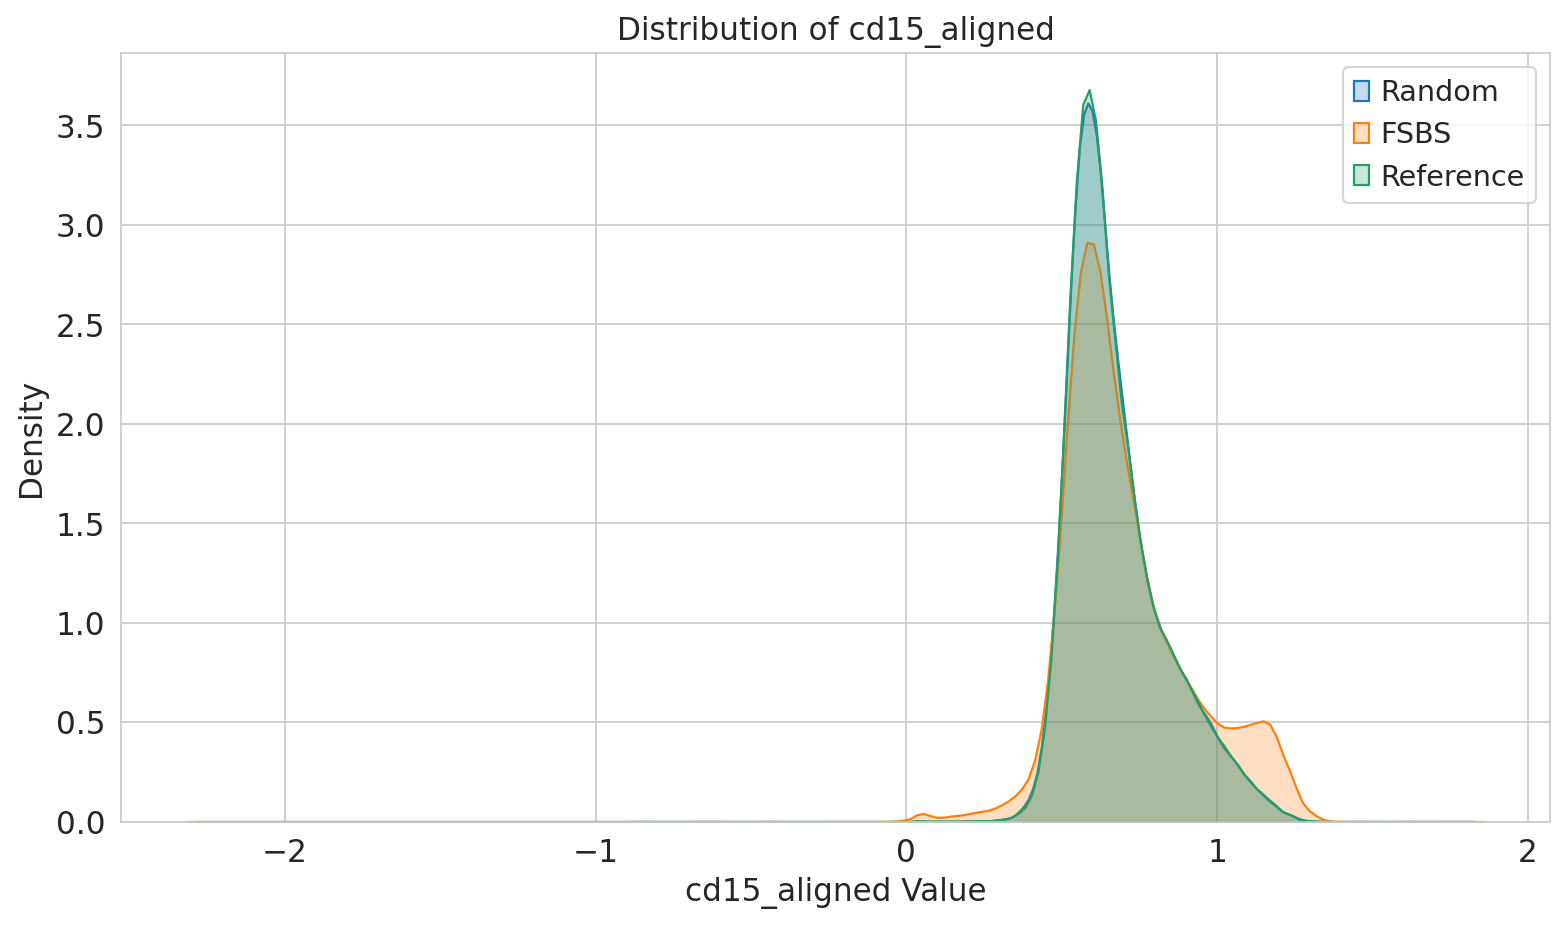

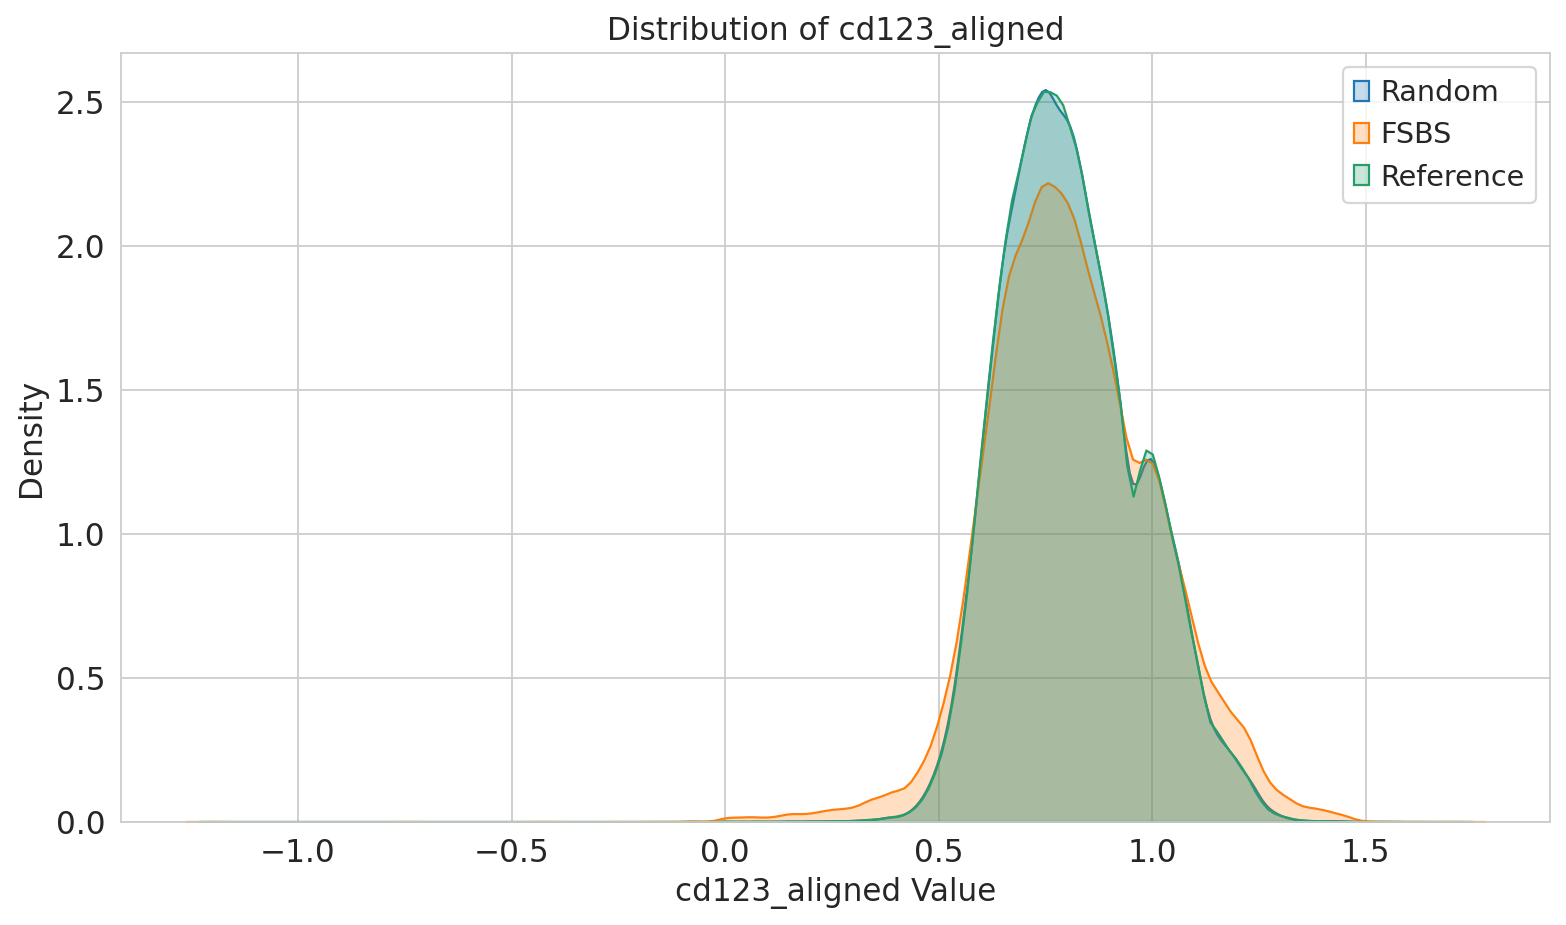

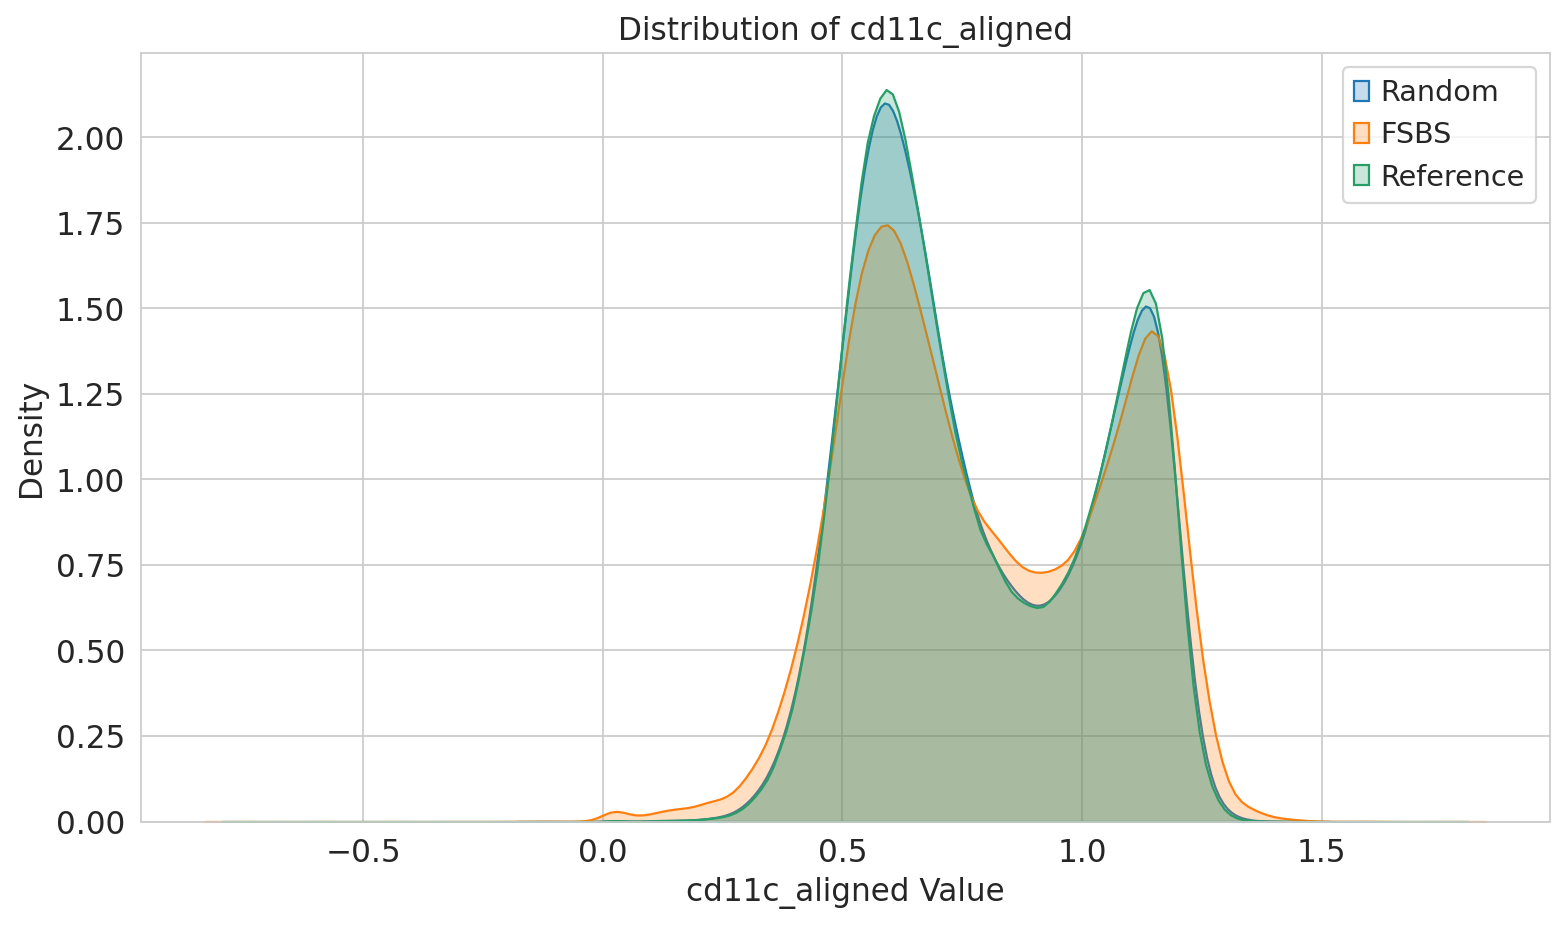

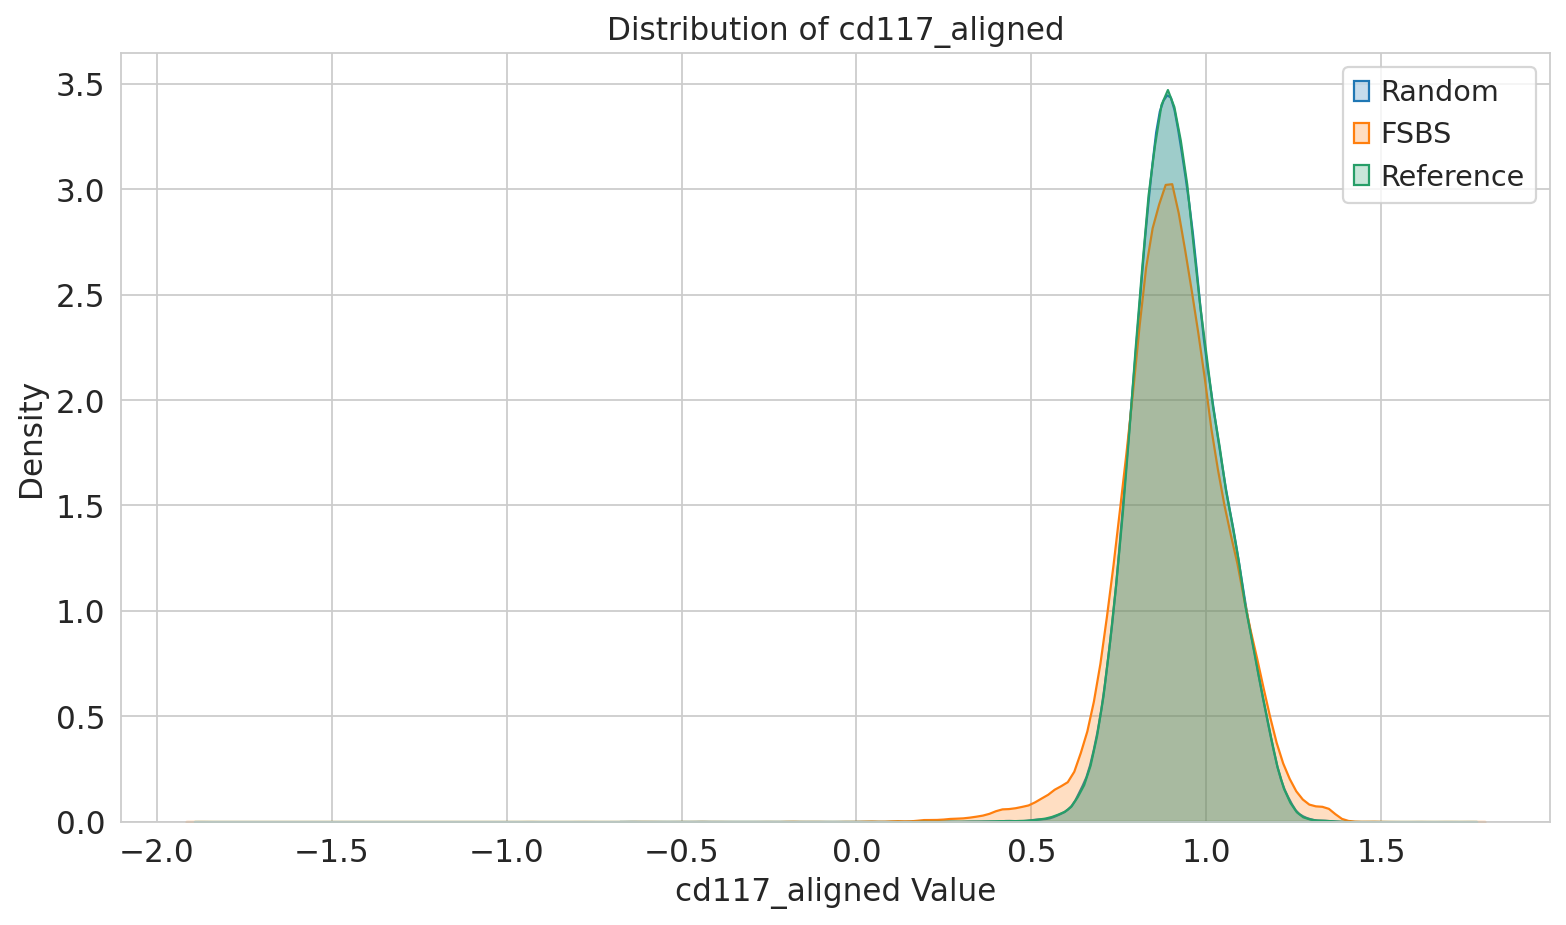

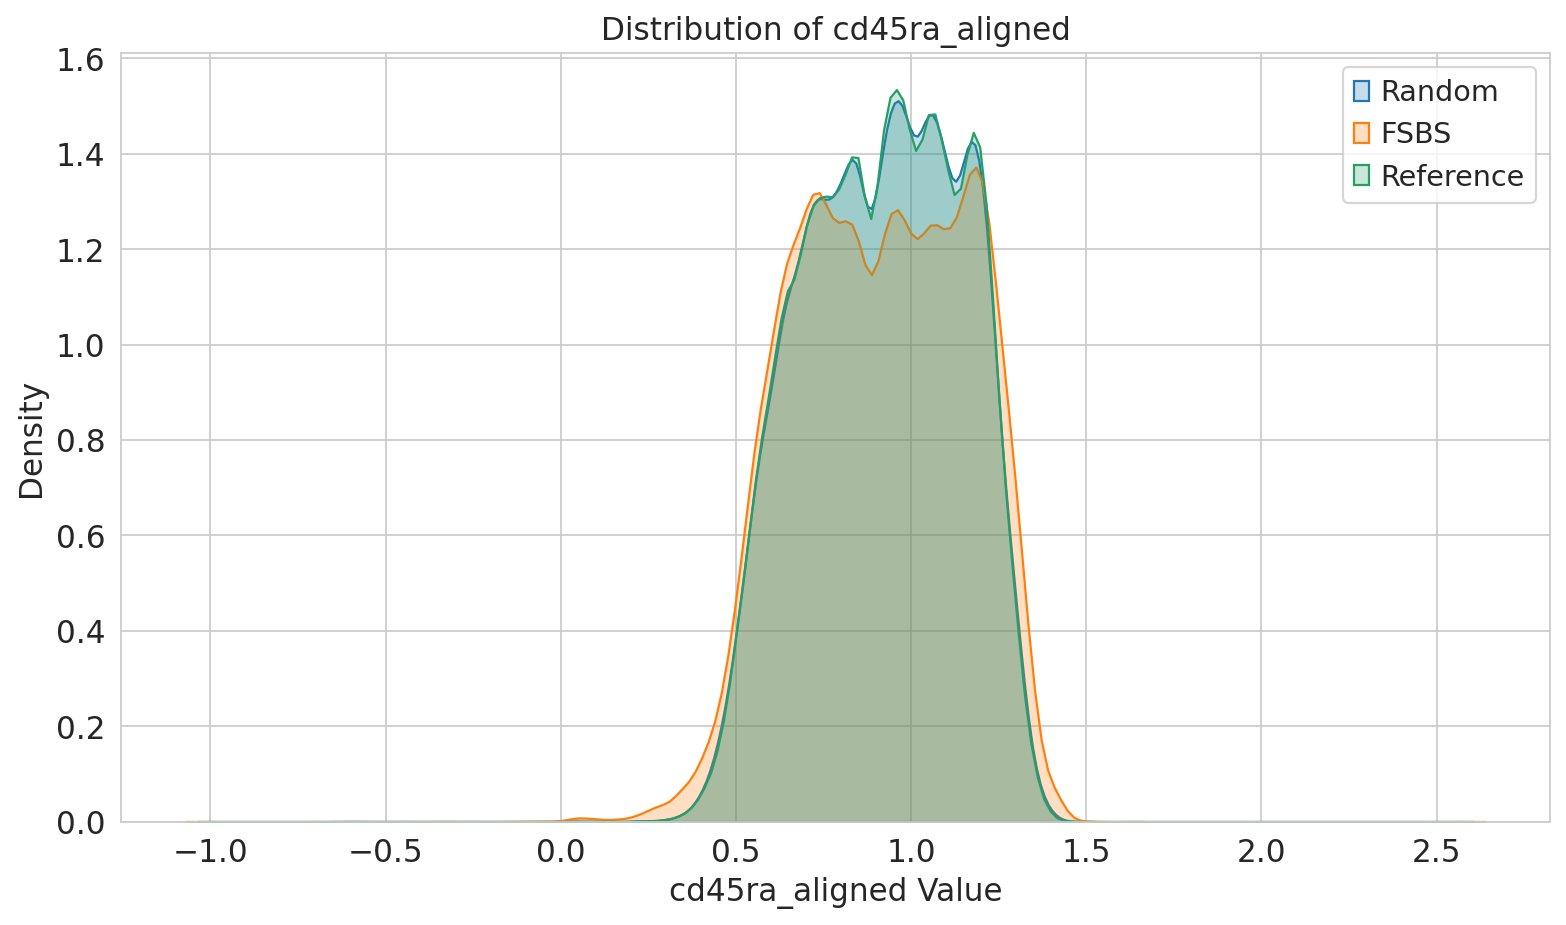

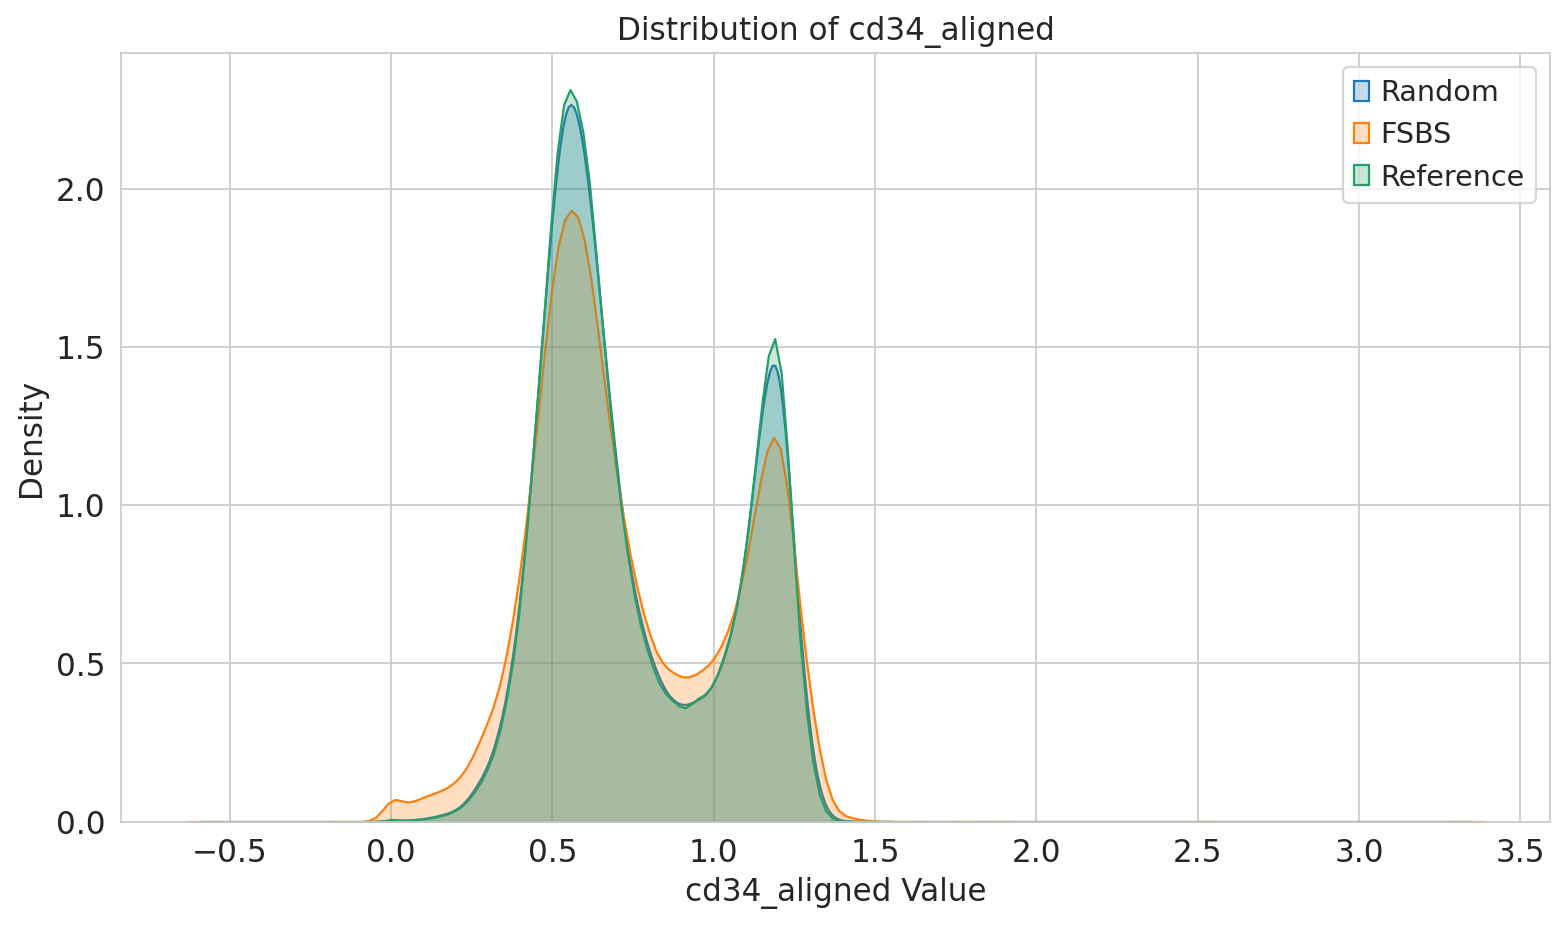

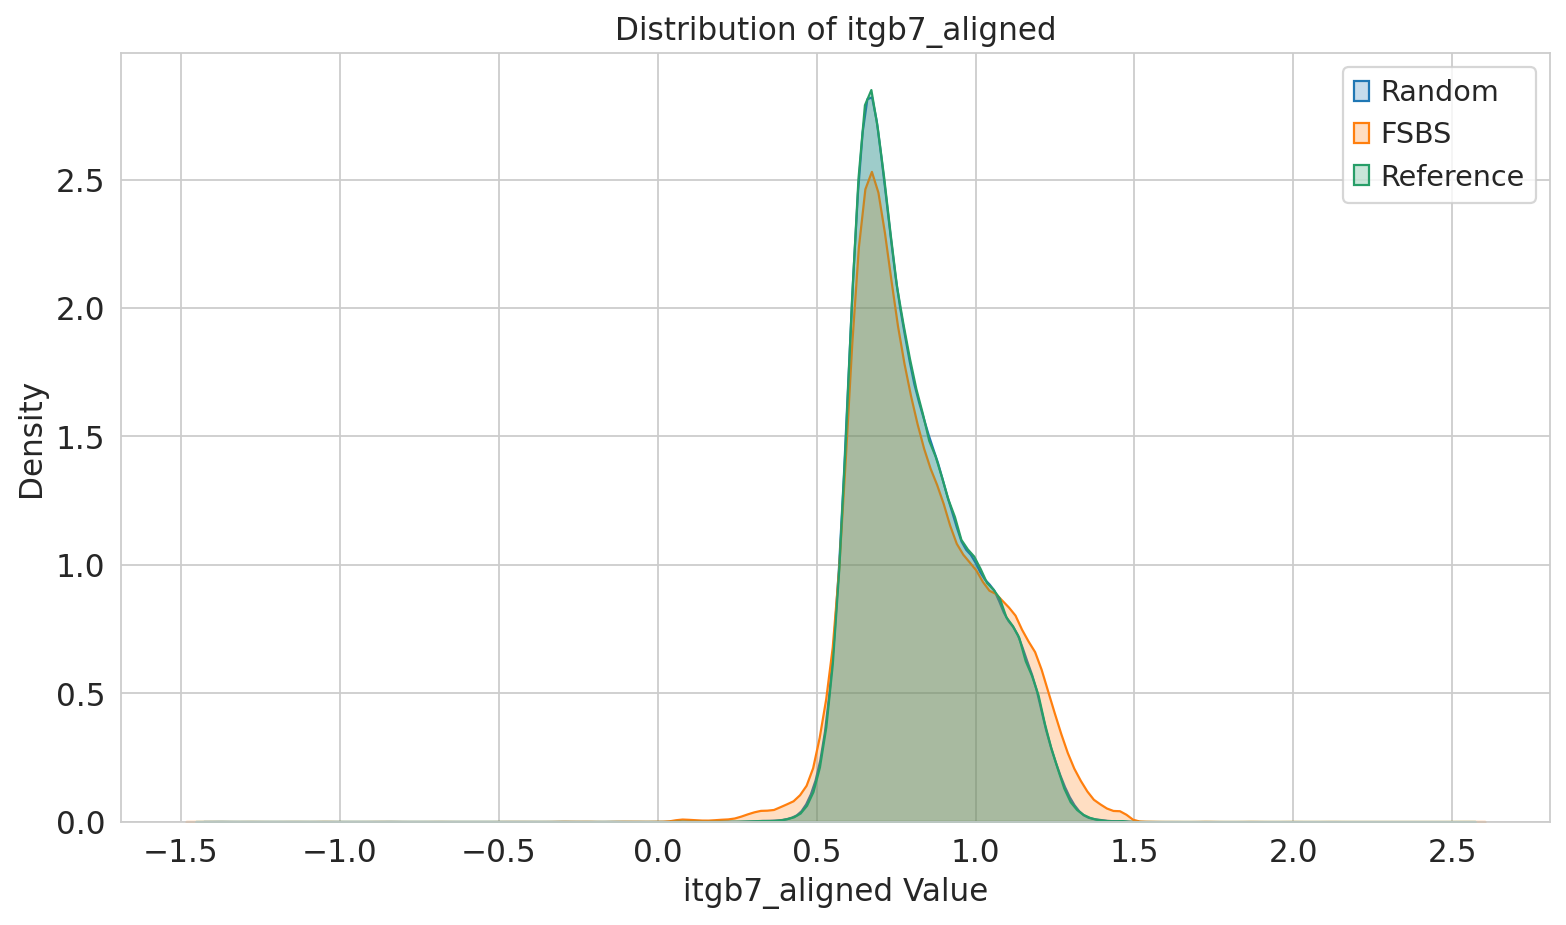

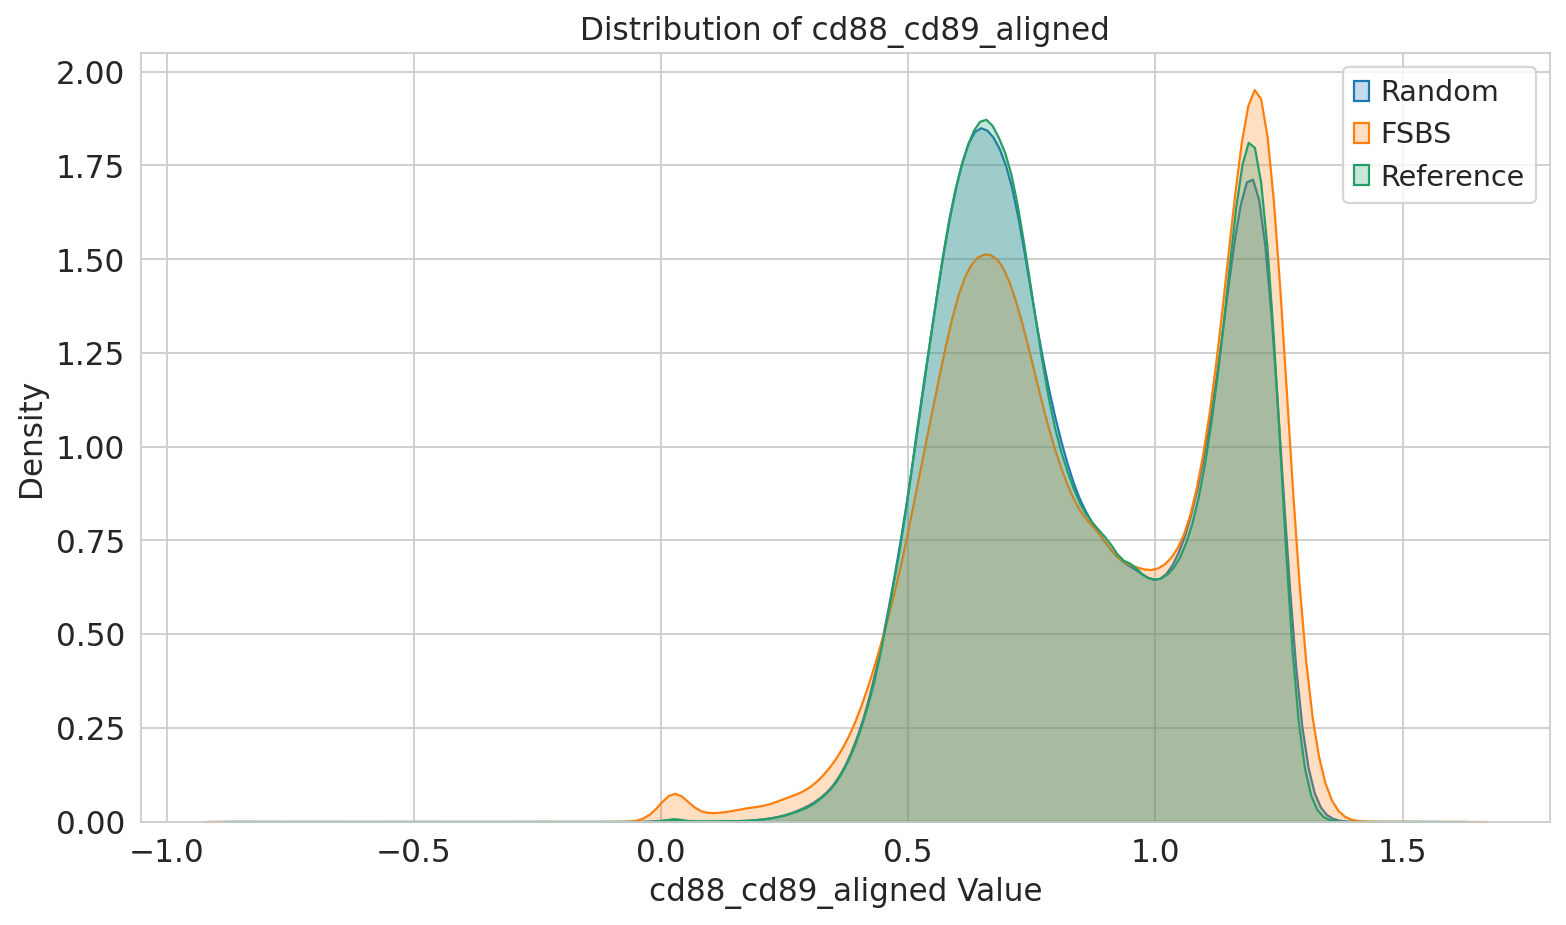

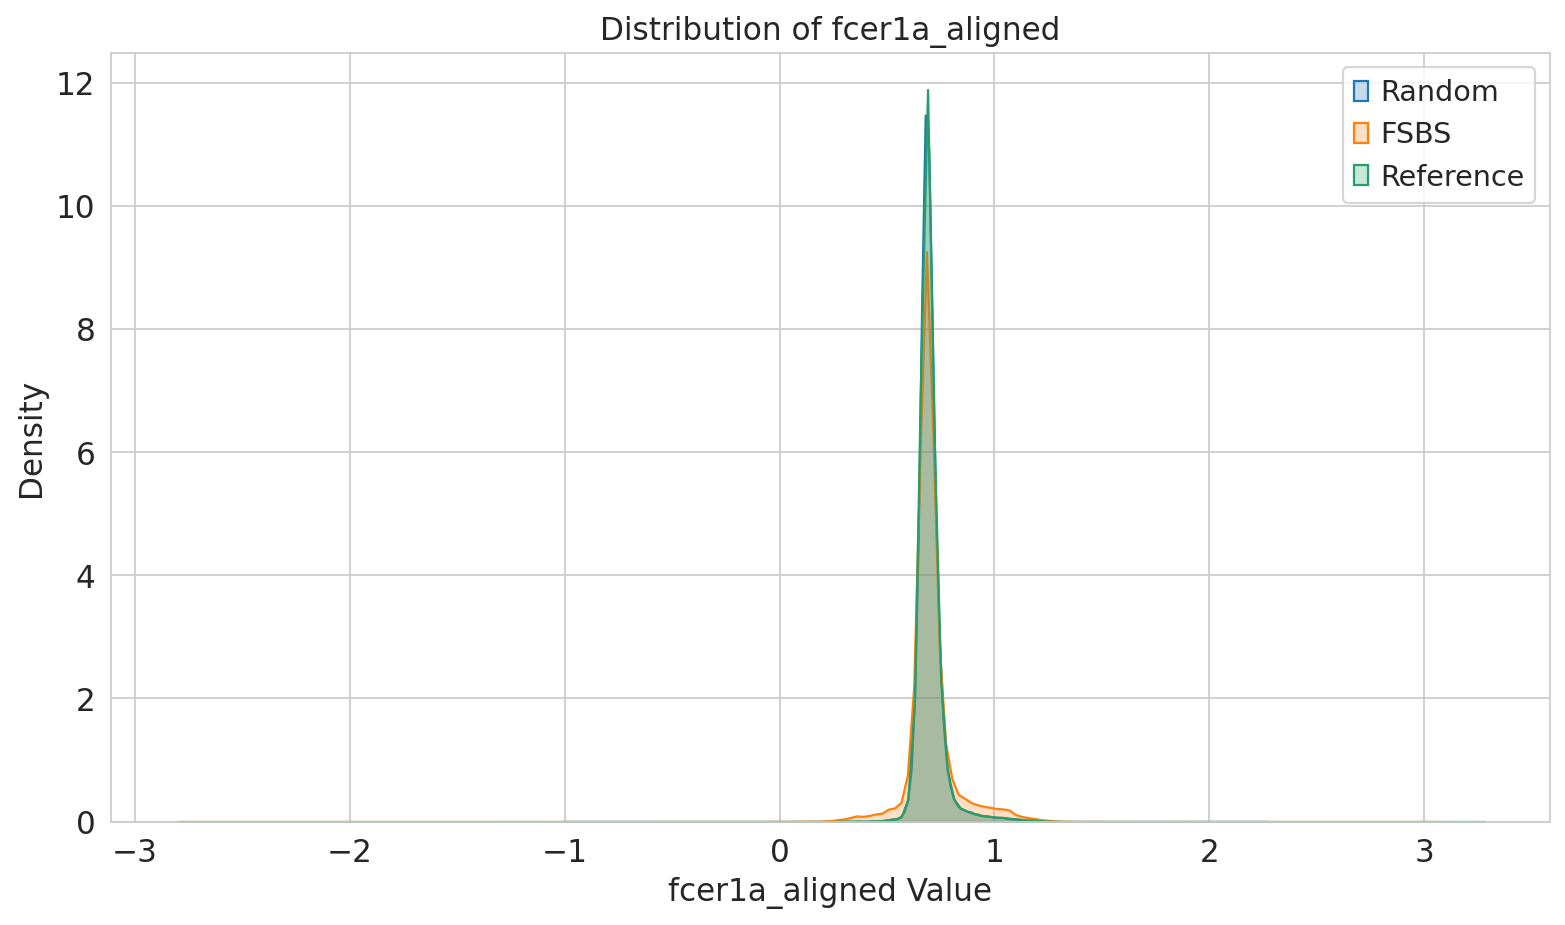

In [4]:

# Example usage for a feature named 'marker1'
for marker in adata_ref.var_names:
    plot_feature_distribution([adata_random, adata_fsbs, adata_ref], marker , ['Random', 'FSBS', 'Reference'])

In [20]:
list(adata_ref.var_names)

['cd33_aligned',
 'hla_dr_aligned',
 'cd19_cd3_aligned',
 'cd11b_aligned',
 'cd66b_aligned',
 'cd16_aligned',
 'cd163_aligned',
 'cd14_aligned',
 'cd2_aligned',
 'siglec8_aligned',
 'cd13_aligned',
 'cd45_aligned',
 'cd141_aligned',
 'cd15_aligned',
 'cd123_aligned',
 'cd11c_aligned',
 'cd117_aligned',
 'cd45ra_aligned',
 'cd34_aligned',
 'itgb7_aligned',
 'cd88_cd89_aligned',
 'fcer1a_aligned']

In [18]:
adata_ref[adata_ref.obs['population'] == 'neutrophil_like'][:, 1]

View of AnnData object with n_obs × n_vars = 28218 × 1
    obs: 'old_index', 'unique_id', 'sex', 'age', 'subtype', 'type', 'blastcount', 'survival_sorter', 'run', 'sample_id', 'alignment_mc_aligned', 'flowsom_cluster', 'flowsom_metacluster', 'population'

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming `df` is your DataFrame and it has a 'cell_type' column and 22 marker columns
# Example structure of df:
# df = pd.DataFrame({
#     'cell_type': np.random.choice(['CellType1', 'CellType2', ..., 'CellType16'], size=1000),
#     'Marker1': np.random.randn(1000),
#     ...,
#     'Marker22': np.random.randn(1000)
# })

def plot_population_markers(adata):
    # Create the subplots
    # 16 classes and 22 markers
    fig, axes = plt.subplots(nrows=16, ncols=22, figsize=(22 * 2, 16 * 2), sharex='col', sharey='row')

    # Set the cell type names and marker names
    cell_types = list(adata.obs['population'].value_counts().keys())  # Replace with your cell type names
    markers = list(adata.var_names)  # Replace with your marker names

    # Iterate over each subplot and fill in the ridge plot
    for i, cell_type in enumerate(cell_types):
        for j, marker in enumerate(markers):
            ax = axes[i, j]
            data = adata_ref[adata_ref.obs['population'] == cell_type][:, j]
            # data = df[df['population'] == cell_type][marker]
            sns.kdeplot(data, ax=ax, shade=True)
            ax.set_title(f'{cell_type} - {marker}')
            ax.set_ylabel('')
            ax.set_xlabel('')
            print('yes')

    # Adjust the layout
    plt.tight_layout()
    plt.show()


/tmp/6628272.1.all.q/ipykernel_16018/3602337764.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, ax=ax, shade=True)


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x2aba57c36cb0> (for post_execute):


KeyboardInterrupt: 

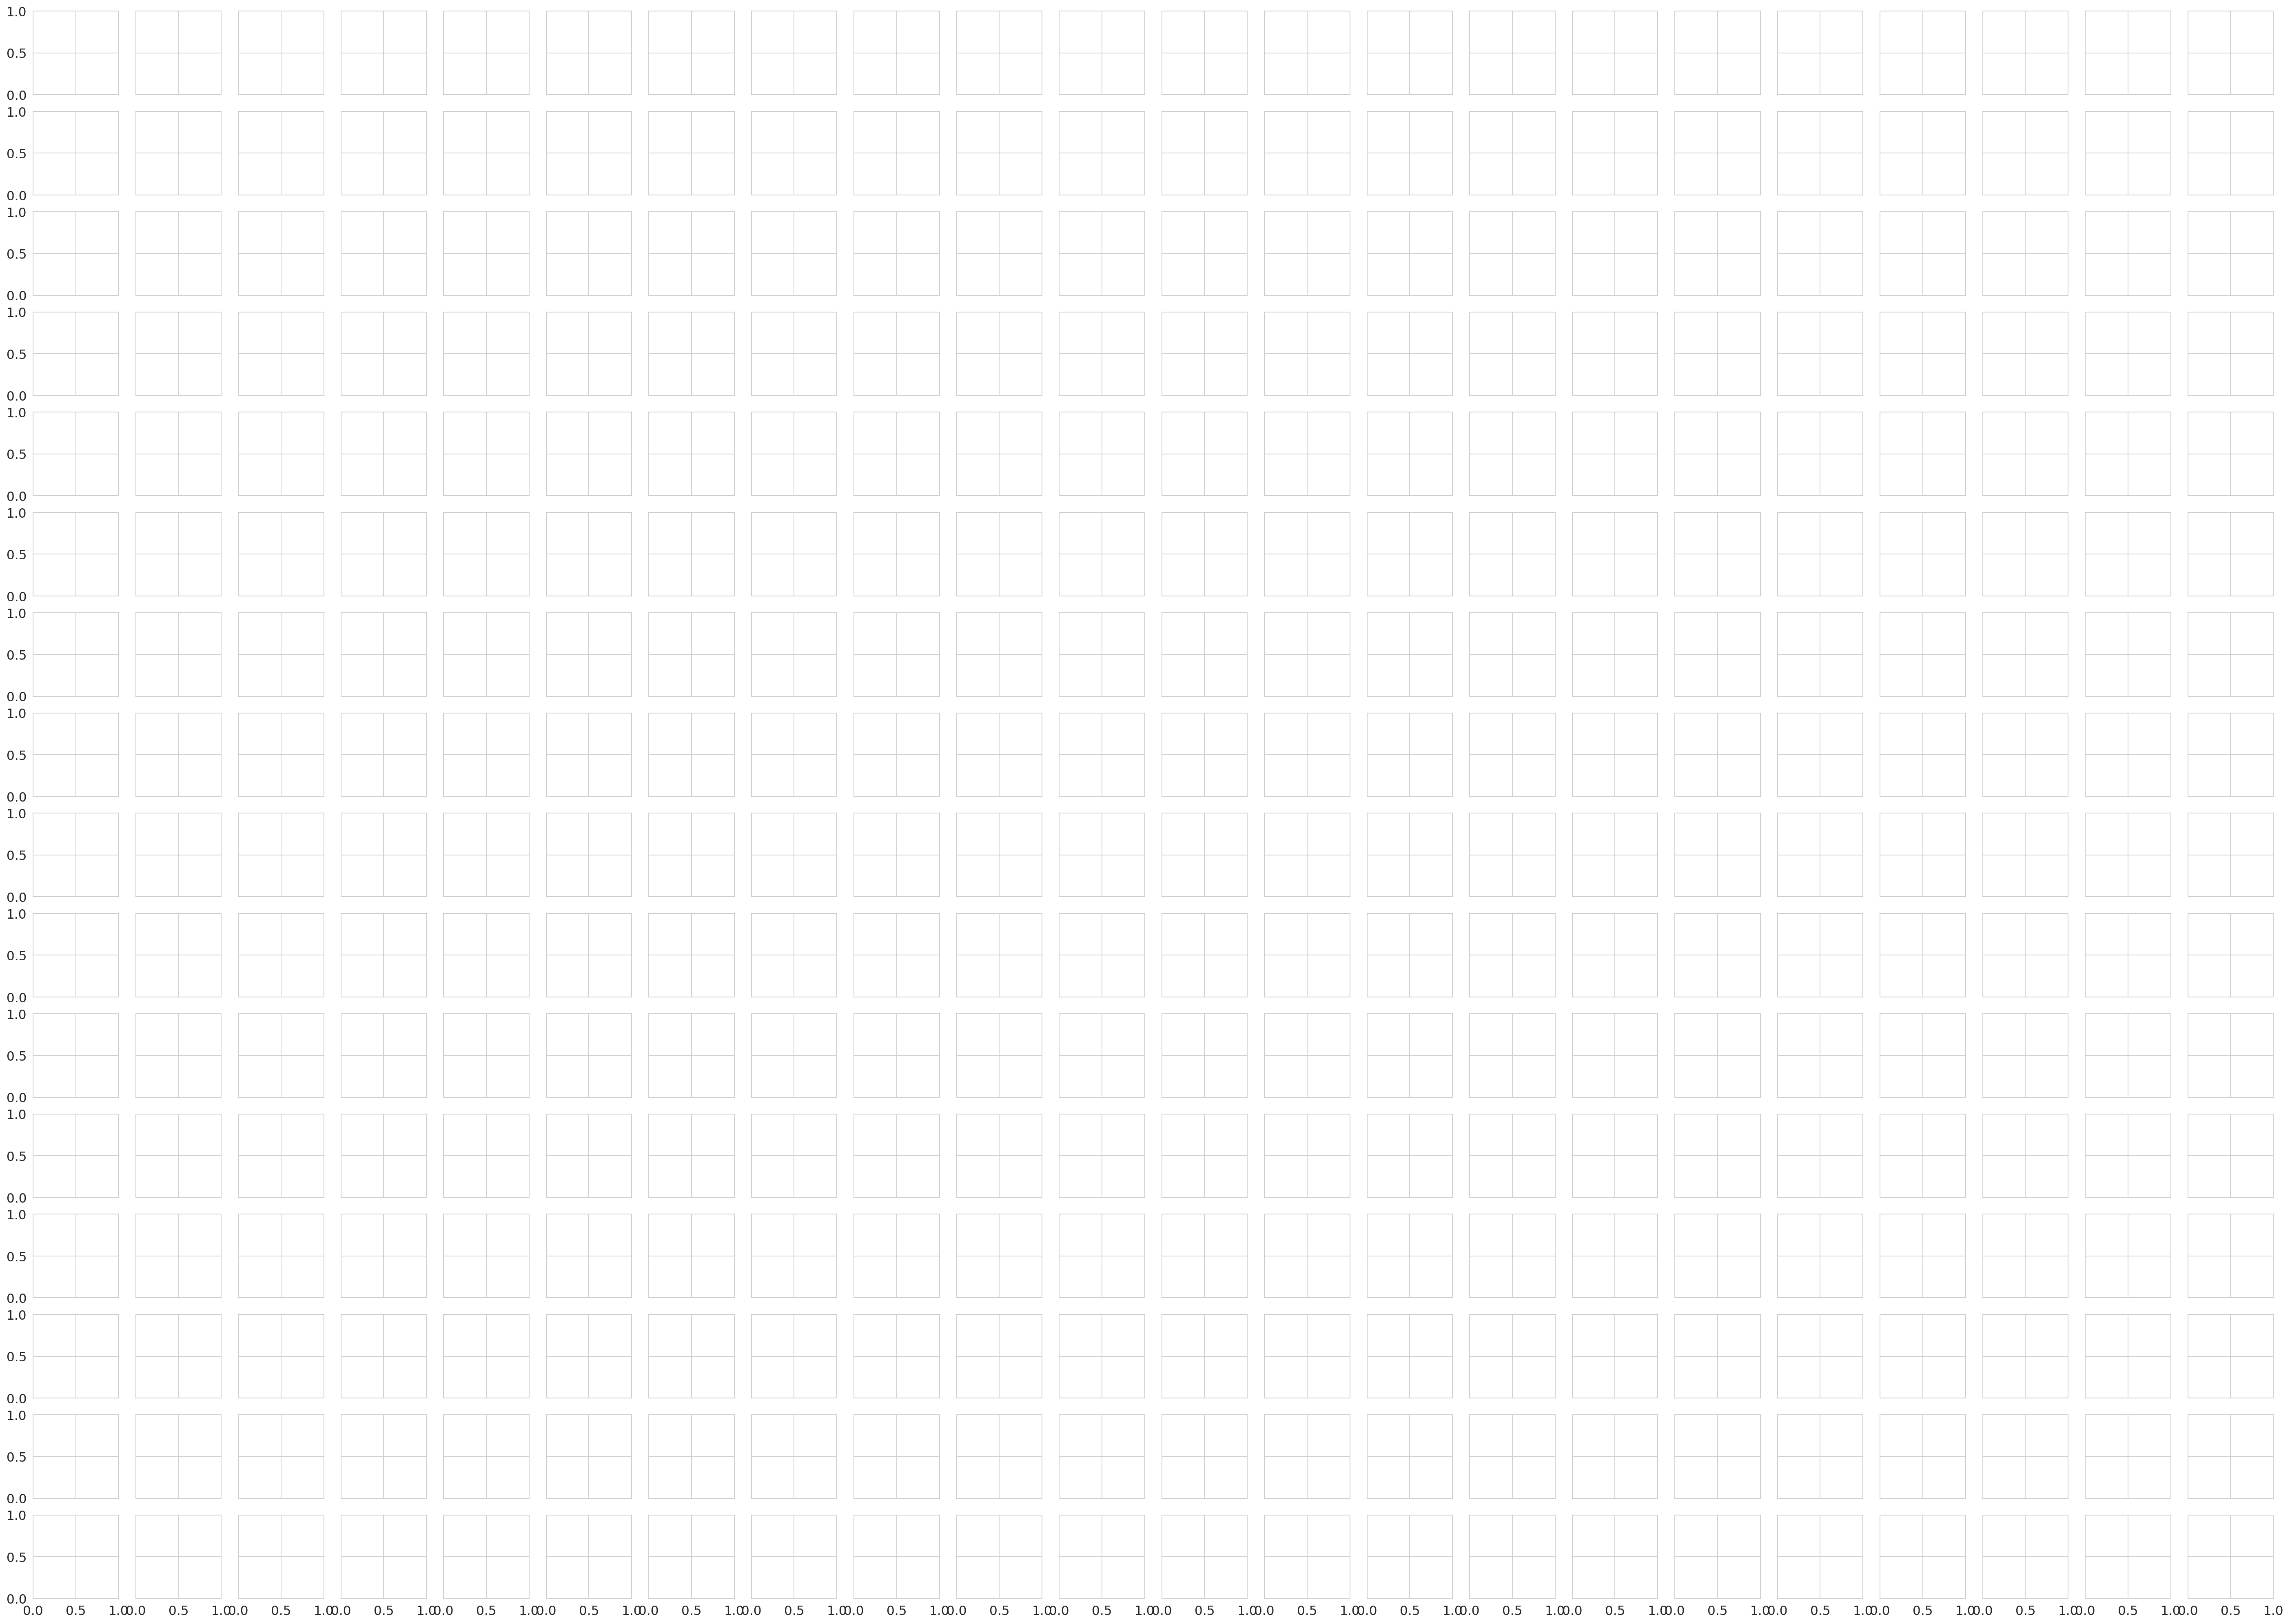

In [5]:
plot_population_markers(adata_random)

In [ ]:
print('hello')